# Business Case: Walmart - Confidence Interval and CLT


## About Walmart
Walmart is an American multinational retail corporation that operates a chain of 
supercenters, discount departmental stores, and grocery stores from the United States. 
Walmart has more than 100 million customers worldwide.

## Business Problem
The Management team at Walmart Inc. wants to analyze the customer purchase 
behavior (specifically, purchase amount) against the customer’s gender and the various 
other factors to help the business make better decisions. They want to understand if the 
spending habits differ between male and female customers: Do women spend more on 
Black Friday than men? (Assume 50 million customers are male and 50 million are 
female).


In [486]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.utils import resample
from scipy.stats import norm

## problem statement

- Distribution of quantitative data
- Detect outlayer values if any?
- Tracking the amount spent per transaction of all the 50 million female customers, and all the 50 million male customers,
  calculate the average, and conclude the results.
- Percentage of male and female coustomers
- Totel purchase amount by Genter
- Totel purchases by Marital_Status
- Avrage Purchase amount by Marital_Status
- Find the correlation between quantitative data
- Use the sample average to find out an interval within which the population average will lie
- Find the purchase confidance intervel of male coustomers
- Find the purchase confidance intervel of female coustomers
- Distribution of purchase values for diffrent sample spaces
- calculate the interval within which the average spending of 50 million Married customers may lie
- calculate the interval within which the average spending of 50 million Unmarried customers may lie
- Find confidance intervel of Purchase values of married and unmarried people overlaps
- Calculate the interval within which the average spending of 50 million Diffrent age group may lie
- Find confidance intervel of Purchase values of diffrent age groups overlap
- Find the purchase mean for each genter for Stay_In_Current_City_Years
- Find the purchase count for each Occupation level for diffrent citys
- Find the purchase mean for each Occupation level for diffrent citys
- Find the purchase mean for each citys for each genter 
- How purchase value varies for diffrent citys
- Most purchasing product category in each genter
- Top purchasing product category for married and unmarried people
- Find the most expensive product category
- Price range of top 3 selling product
- Find relation between age category vs purchase count
- No of products in each product category
- Find top 5 selling products and price range
- Who are the top 5 most money purchased users
- Who are the top 5 most money purchased users in each city
- How purchase amount vary in each city
- Probability of totel amount purchased in each city
- Which occupation category has most number of coustomer purchases
- Which occupation category has most purchase mean
- Which city has the highest purchase in each age group
- which city has the highest purchase in each Product_Category

In [326]:
df=pd.read_csv('walmart_data.csv')
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [3]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [4]:
#length of data
len(df)

550068

In [5]:
#checking datatypes
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [6]:
#number of unique values in our data
for i in df.columns:
  print(i,':',df[i].nunique())

User_ID : 5891
Product_ID : 3631
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category : 20
Purchase : 18105


In [7]:
df.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [8]:
#checking datatypes
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [9]:
#number of unique values in our data
for i in df.columns:
  print(i,':',df[i].nunique())

User_ID : 5891
Product_ID : 3631
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category : 20
Purchase : 18105


In [10]:
#checking the occurences of each of the Product_Category
df['Product_Category'].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64

In [11]:
#checking the occurences of each of the Occupation
df['Occupation'].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

In [12]:
#checking the occurences of each of the Product_Category
df['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [13]:
#checking the occurences of each of the User_ID
df['User_ID'].value_counts()

1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64

### Distribution of Quatitative data

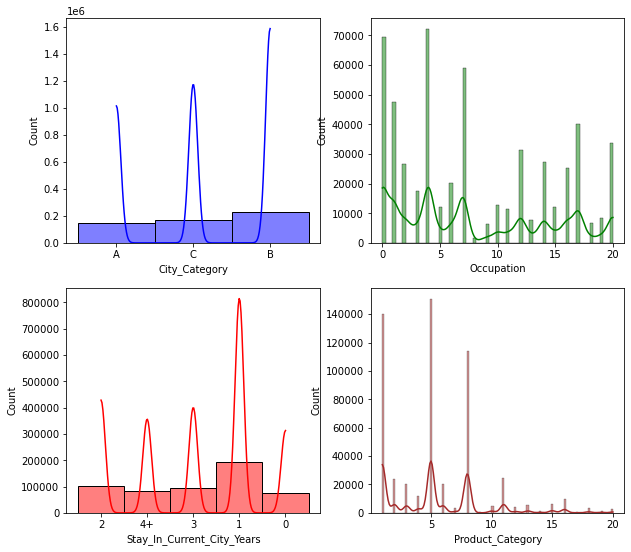

In [504]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(10,5))
fig.subplots_adjust(top=1.5)
sns.histplot(data=df, x="City_Category", kde=True,color="blue", ax=axis[0,0])
sns.histplot(data=df, x="Occupation", kde=True,color="green", ax=axis[0,1])
sns.histplot(data=df, x="Stay_In_Current_City_Years", kde=True,color="red", ax=axis[1,0])
sns.histplot(data=df, x="Product_Category", kde=True,color="brown", ax=axis[1,1])
plt.show()

#### stayed in city for 1 years have purchased most of the products
#### product category 1,5,8 are most purchased product

### Detect Outliers

In [330]:
ds=df[['Occupation','Purchase']]

In [331]:
for i in ds.columns:
    print('median of ',i,'=',ds[i].median())

median of  Occupation = 7.0
median of  Purchase = 8047.0


In [332]:
df.describe()

,User_ID,Occupation,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,5.404270,9263.968713
std,1.727592e+03,6.522660,3.936211,5023.065394
min,1.000001e+06,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,20.000000,23961.000000


#### Mean and median of purchase values shows large diffrance. So, we need to find outlayer values of purchace

C:\Users\I Am Guest\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


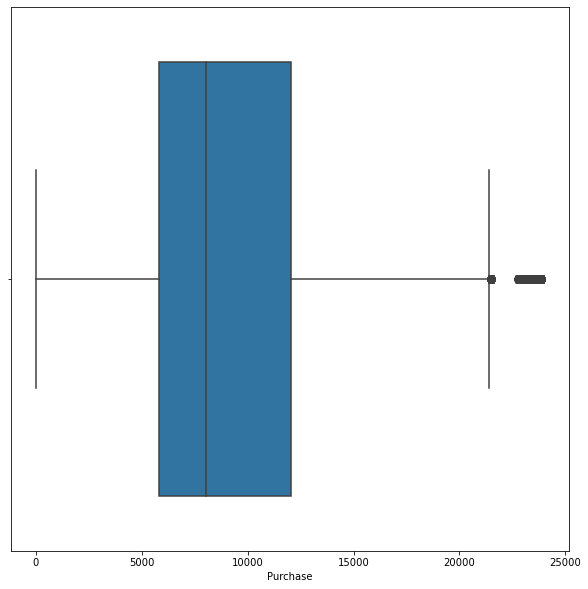

In [333]:
plt.figure(figsize=(10,10))
sns.boxplot(df['Purchase'])
plt.show()

In [334]:
p_25=df['Purchase'].quantile(.25)
p_25

5823.0

In [335]:
p_75=df['Purchase'].quantile(.75)
p_75

12054.0

In [336]:
iqr=p_75-p_25
iqr

6231.0

In [337]:
lower=p_25-(1.5*iqr)
upper=p_75+(1.5*iqr)
print(lower)
print(upper)

-3523.5
21400.5


In [338]:
df[(df['Purchase']<lower)|(df['Purchase']>upper)].Purchase.to_frame('Purchase').reset_index().drop('index',axis=1)

,Purchase
0,23603
1,23792
2,23233
3,23595
4,23341
...,...
2672,23753
2673,23724
2674,23529
2675,23663


#### There are 2677 outlayer values in purchase

### data after removing outlayer values

In [339]:
da=df[(df['Purchase']>lower)&(df['Purchase']<upper)]
da

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,Unmarried,3,8370
1,1000001,P00248942,F,0-17,10,A,2,Unmarried,1,15200
2,1000001,P00087842,F,0-17,10,A,2,Unmarried,12,1422
3,1000001,P00085442,F,0-17,10,A,2,Unmarried,12,1057
4,1000002,P00285442,M,55+,16,C,4+,Unmarried,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,Married,20,368
550064,1006035,P00375436,F,26-35,1,C,3,Unmarried,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,Married,20,137
550066,1006038,P00375436,F,55+,1,C,2,Unmarried,20,365


In [272]:
# For our convenient use of Stay_In_Current_City_Years convert 4+ years to 4 years
da['Stay_In_Current_City_Years']=da['Stay_In_Current_City_Years'].str.replace("+","").astype('int')
da.info()

C:\Users\I Am Guest\AppData\Local\Temp\ipykernel_17052\1303559507.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  da['Stay_In_Current_City_Years']=da['Stay_In_Current_City_Years'].str.replace("+","").astype('int')
C:\Users\I Am Guest\AppData\Local\Temp\ipykernel_17052\1303559507.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  da['Stay_In_Current_City_Years']=da['Stay_In_Current_City_Years'].str.replace("+","").astype('int')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 547391 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     547391 non-null  int64 
 1   Product_ID                  547391 non-null  object
 2   Gender                      547391 non-null  object
 3   Age                         547391 non-null  object
 4   Occupation                  547391 non-null  int64 
 5   City_Category               547391 non-null  object
 6   Stay_In_Current_City_Years  547391 non-null  int32 
 7   Marital_Status              547391 non-null  int64 
 8   Product_Category            547391 non-null  int64 
 9   Purchase                    547391 non-null  int64 
dtypes: int32(1), int64(5), object(4)
memory usage: 43.9+ MB


In [329]:
#converting Marital_Status to accecable format
df['Marital_Status'].replace({0:'Unmarried', 1:'Married'},inplace=True)
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,Unmarried,3,8370
1,1000001,P00248942,F,0-17,10,A,2,Unmarried,1,15200
2,1000001,P00087842,F,0-17,10,A,2,Unmarried,12,1422
3,1000001,P00085442,F,0-17,10,A,2,Unmarried,12,1057
4,1000002,P00285442,M,55+,16,C,4+,Unmarried,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,Married,20,368
550064,1006035,P00375436,F,26-35,1,C,3,Unmarried,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,Married,20,137
550066,1006038,P00375436,F,55+,1,C,2,Unmarried,20,365


#### Tracking the amount spent per transaction of all the 50 million female customers, and all the 50 million male customers,calculate the average, and conclude the results.


In [514]:
da.groupby('Gender')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135220.0,8671.049039,4679.058483,12.0,5429.0,7906.0,11064.0,21398.0
M,412171.0,9367.724355,5009.234088,12.0,5852.0,8089.0,12247.0,21399.0


<AxesSubplot:ylabel='Purchase'>

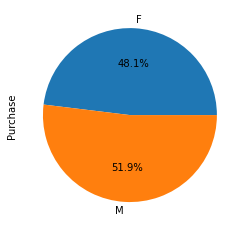

In [511]:
da.groupby('Gender')['Purchase'].mean().plot(kind='pie',autopct='%1.1f%%')

#### we can see that avrage purchase of male is greater than female.male is the most amount spent per transaction

### Totel purchase amount by Genter

<AxesSubplot:ylabel='Purchase'>

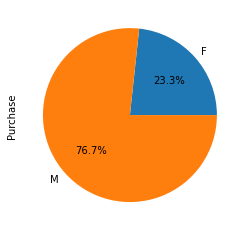

In [26]:
da.groupby('Gender')['Purchase'].sum().plot(kind='pie',autopct='%1.1f%%')

#### almost 76% of purchased amount are from male

### Percentage of male and female coustomers

<AxesSubplot:ylabel='User_ID'>

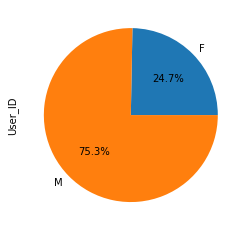

In [346]:
da.groupby('Gender')['User_ID'].count().plot(kind='pie',autopct='%1.1f%%')

#### 75 percentage of the coustemers are male

### Totel purchases by Marital_Status

<AxesSubplot:xlabel='Marital_Status'>

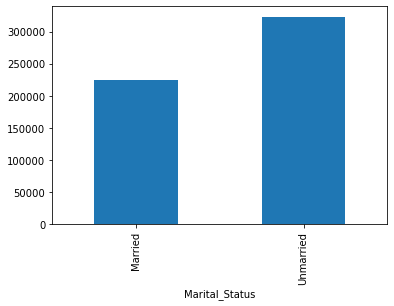

In [348]:
da.groupby('Marital_Status')['Purchase'].count().plot(kind='bar')

#### Unmarried people's purchase is higher than married

### Avrage Purchase amount by Marital_Status 

<AxesSubplot:ylabel='Purchase'>

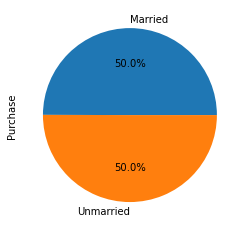

In [356]:
da.groupby('Marital_Status')['Purchase'].mean().plot(kind='pie',autopct='%1.1f%%')

#### > Avrage Purchase amount of both married and unmarried are almost equal

## Correlation of data

In [506]:
da.corr()

,User_ID,Occupation,Product_Category,Purchase
User_ID,1.000000,-0.024127,0.003631,0.004102
Occupation,-0.024127,1.000000,-0.008180,0.020428
Product_Category,0.003631,-0.008180,1.000000,-0.370128
Purchase,0.004102,0.020428,-0.370128,1.000000


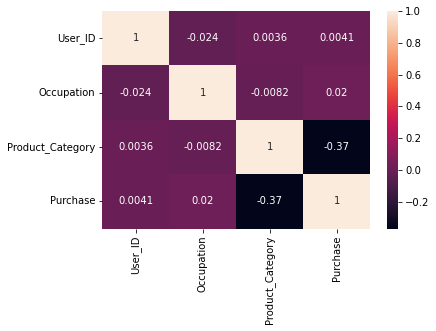

In [508]:
sns.heatmap(da.corr(),annot=True)
plt.show()

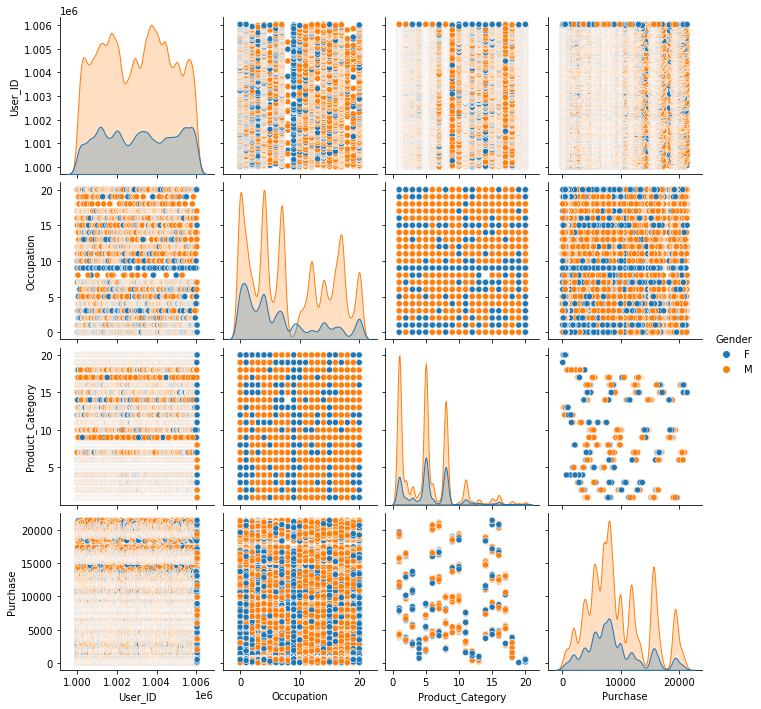

In [510]:
sns.pairplot(da,hue='Gender')
plt.show()

In [509]:
da

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,Unmarried,3,8370
1,1000001,P00248942,F,0-17,10,A,2,Unmarried,1,15200
2,1000001,P00087842,F,0-17,10,A,2,Unmarried,12,1422
3,1000001,P00085442,F,0-17,10,A,2,Unmarried,12,1057
4,1000002,P00285442,M,55+,16,C,4+,Unmarried,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,Married,20,368
550064,1006035,P00375436,F,26-35,1,C,3,Unmarried,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,Married,20,137
550066,1006038,P00375436,F,55+,1,C,2,Unmarried,20,365


### Use the sample average to find out an interval within which the population average will lie

[]

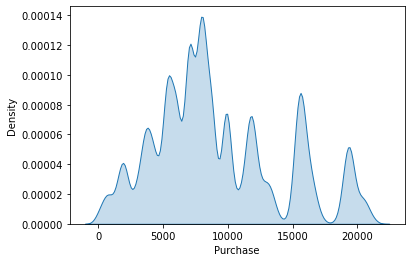

In [29]:
sns.kdeplot(da['Purchase'],fill=True)
plt.plot()

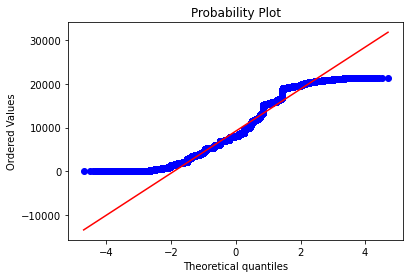

In [60]:
stats.probplot(da['Purchase'],dist='norm',plot=plt)
plt.show()

#### it is not a normal distribution curve. By central limit theoram find bootstrap_means

In [63]:
da.Purchase.count()

547391

In [62]:
n_iteration=1000
bootstrap_means=[]
sample_size=100000
for i in range(n_iteration):
    s=resample(da['Purchase'],n_samples=sample_size)
    m=np.mean(s)
    bootstrap_means.append(m)

In [64]:
bootstrap_means

[9203.21647,
 9187.04782,
 9210.45021,
 9221.1607,
 9191.95109,
 9186.40475,
 9191.10939,
 9189.6769,
 9220.93791,
 9209.04771,
 9198.53185,
 9201.70288,
 9219.32569,
 9195.15183,
 9190.09569,
 9199.11128,
 9189.57293,
 9209.17036,
 9206.2679,
 9186.81175,
 9198.70817,
 9192.01502,
 9232.89219,
 9190.42146,
 9178.56933,
 9176.38502,
 9199.30594,
 9180.44539,
 9214.35529,
 9186.45897,
 9205.01993,
 9219.06143,
 9171.92332,
 9168.13418,
 9200.13336,
 9200.14025,
 9180.66811,
 9172.35586,
 9179.43608,
 9203.74588,
 9179.30908,
 9202.82693,
 9200.33743,
 9201.35538,
 9206.93147,
 9210.46687,
 9213.77443,
 9212.38043,
 9184.4583,
 9196.36499,
 9206.19461,
 9196.7037,
 9206.1961,
 9199.89467,
 9191.0507,
 9228.27343,
 9178.57992,
 9191.31314,
 9170.55825,
 9168.52178,
 9178.36912,
 9197.26405,
 9200.39635,
 9176.29324,
 9190.26155,
 9183.34858,
 9184.42095,
 9219.69915,
 9215.07303,
 9206.12769,
 9175.52728,
 9186.12758,
 9214.70307,
 9197.45431,
 9182.1884,
 9213.47,
 9200.34753,
 9207.8941

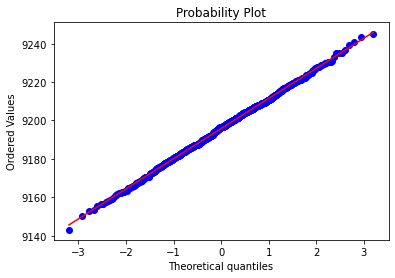

In [65]:
stats.probplot(bootstrap_means,dist='norm',plot=plt)
plt.show()

### we can see from the graph, bootstrap_means are in normal distribution

[]

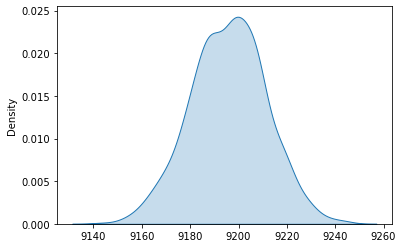

In [66]:
sns.kdeplot(bootstrap_means,fill=True)
plt.plot()

In [67]:
mean=np.mean(bootstrap_means)
mean

9195.77642504

In [68]:
std=np.std(bootstrap_means)
std

15.656042274837677

In [69]:
confidence=0.9
l,u=np.percentile(bootstrap_means,[5,95])
print('lower:',l)
print('upper:',u)

lower: 9169.650806000001
upper: 9220.971379


#### Confidance Interval of 90%lie within  the population's purchase  will lie in intervel [9169.65,9220.97]

### Using the sample of female customers you will calculate the interval within which the average spending of 50 million male and female customers may lie

## Female

In [546]:
dfemale=da[da['Gender']=='F']
dfemale

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,Unmarried,3,8370
1,1000001,P00248942,F,0-17,10,A,2,Unmarried,1,15200
2,1000001,P00087842,F,0-17,10,A,2,Unmarried,12,1422
3,1000001,P00085442,F,0-17,10,A,2,Unmarried,12,1057
14,1000006,P00231342,F,51-55,9,A,1,Unmarried,5,5378
...,...,...,...,...,...,...,...,...,...,...
550061,1006029,P00372445,F,26-35,1,C,1,Married,20,599
550064,1006035,P00375436,F,26-35,1,C,3,Unmarried,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,Married,20,137
550066,1006038,P00375436,F,55+,1,C,2,Unmarried,20,365


[]

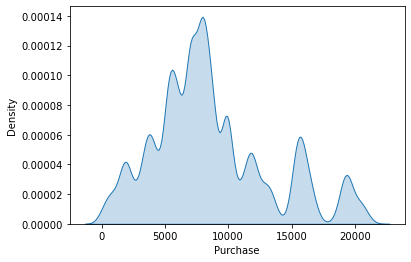

In [547]:
sns.kdeplot(dfemale['Purchase'],fill=True)
plt.plot()

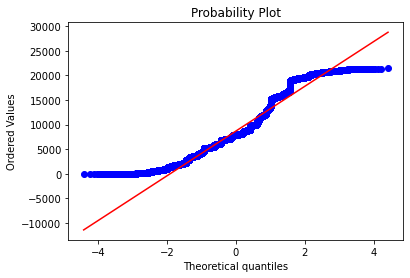

In [548]:
stats.probplot(dfemale['Purchase'],dist='norm',plot=plt)
plt.show()

#### it is not a normal distribution curve. By central limit theoram find bootstrap_means_female

In [549]:
dfemale.Purchase.count()

135220

In [550]:
n_iteration=5000
bootstrap_means_female=[]
sample_size=10000
for i in range(n_iteration):
    s=resample(dfemale['Purchase'],n_samples=sample_size)
    m=np.mean(s)
    bootstrap_means_female.append(m)

In [551]:
bootstrap_means_female

[8714.2179,
 8687.0237,
 8687.2076,
 8678.6702,
 8669.5515,
 8718.6106,
 8692.2109,
 8645.752,
 8686.1851,
 8693.2346,
 8694.6673,
 8635.8945,
 8616.4246,
 8725.2163,
 8545.271,
 8729.1596,
 8671.266,
 8649.2286,
 8626.9208,
 8605.5847,
 8678.6138,
 8733.4557,
 8683.4704,
 8708.2495,
 8692.1172,
 8630.6762,
 8619.317,
 8690.9485,
 8605.1786,
 8741.9004,
 8681.324,
 8627.8715,
 8586.3309,
 8707.0763,
 8692.6932,
 8700.635,
 8723.7687,
 8666.5112,
 8771.8213,
 8677.3701,
 8752.1751,
 8591.6121,
 8713.5146,
 8647.9857,
 8623.4268,
 8650.7544,
 8712.0579,
 8589.2717,
 8694.6961,
 8725.1155,
 8706.8882,
 8704.1951,
 8730.994,
 8692.3956,
 8600.5051,
 8689.2135,
 8643.8136,
 8681.4116,
 8662.1555,
 8685.2331,
 8695.434,
 8700.6037,
 8680.1292,
 8644.3415,
 8642.7611,
 8731.043,
 8661.6197,
 8654.7641,
 8809.0421,
 8634.5454,
 8682.1713,
 8687.6664,
 8685.2221,
 8668.5273,
 8624.6182,
 8652.1364,
 8601.0703,
 8663.5688,
 8701.307,
 8750.7403,
 8665.9061,
 8681.5453,
 8689.6109,
 8637.3925,
 8

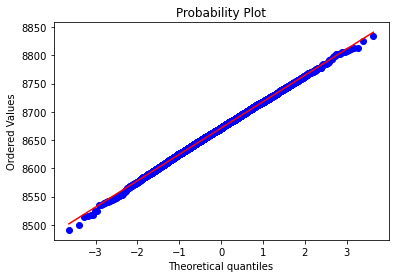

In [552]:
stats.probplot(bootstrap_means_female,dist='norm',plot=plt)
plt.show()

### we can see from the graph, bootstrap_means are in normal distribution

[]

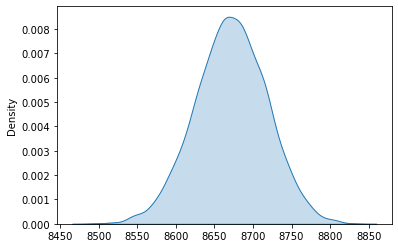

In [553]:
sns.kdeplot(bootstrap_means_female,fill=True)
plt.plot()

In [554]:
mean=np.mean(bootstrap_means_female)
mean

8671.263094060001

In [555]:
std=np.std(bootstrap_means_female)
std

46.5672547346186

In [558]:
confidence=0.9
lower_female,upper_female=np.percentile(bootstrap_means_female,[5,95])
print('lower:',lower_female)
print('upper:',upper_female)

lower: 8593.251110000001
upper: 8746.807449999998


#### Confidance Interval of 90%lie within  the male's purchase  will lie in intervel [8593.25,8746.8]

## male

In [82]:
dmale=da[da['Gender']=='M']
dmale

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
...,...,...,...,...,...,...,...,...,...,...
550057,1006023,P00370853,M,26-35,0,C,2,1,19,61
550058,1006024,P00372445,M,26-35,12,A,0,1,20,121
550060,1006026,P00371644,M,36-45,6,C,1,1,20,494
550062,1006032,P00372445,M,46-50,7,A,3,0,20,473


[]

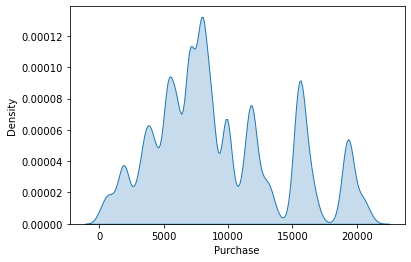

In [83]:
sns.kdeplot(dmale['Purchase'],fill=True)
plt.plot()

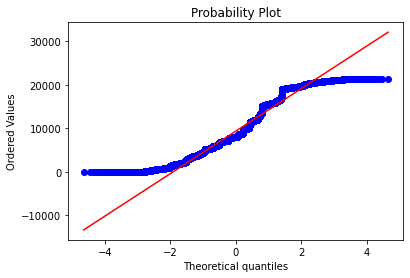

In [84]:
stats.probplot(dmale['Purchase'],dist='norm',plot=plt)
plt.show()

#### it is not a normal distribution curve. By central limit theoram find bootstrap_means_male

In [85]:
dmale.Purchase.count()

412171

In [86]:
n_iteration=5000
bootstrap_means_male=[]
sample_size=100000
for i in range(n_iteration):
    s=resample(dmale['Purchase'],n_samples=sample_size)
    m=np.mean(s)
    bootstrap_means_male.append(m)

In [87]:
bootstrap_means_male

[9349.5534,
 9376.29238,
 9354.96288,
 9352.42509,
 9364.05029,
 9387.49974,
 9363.90117,
 9365.10101,
 9361.24057,
 9337.8289,
 9376.61269,
 9406.27008,
 9372.08145,
 9359.40361,
 9384.92472,
 9365.58528,
 9357.54583,
 9383.25595,
 9349.59814,
 9380.02704,
 9337.88996,
 9350.06763,
 9406.25133,
 9358.56198,
 9395.5276,
 9332.64091,
 9373.83934,
 9373.29255,
 9380.27873,
 9371.43282,
 9357.74934,
 9372.11222,
 9362.41878,
 9366.53791,
 9385.8578,
 9379.12808,
 9345.64737,
 9349.86116,
 9399.32256,
 9360.44328,
 9392.26273,
 9372.85579,
 9353.62752,
 9398.67963,
 9362.37574,
 9334.6088,
 9363.51526,
 9372.81497,
 9362.17448,
 9357.47464,
 9360.00018,
 9361.49139,
 9344.21906,
 9368.91422,
 9333.71975,
 9372.19469,
 9396.70717,
 9388.59703,
 9366.87191,
 9349.81033,
 9370.85728,
 9370.6489,
 9379.73723,
 9343.41185,
 9367.02548,
 9380.13231,
 9348.36554,
 9370.48877,
 9367.9774,
 9350.06272,
 9380.2638,
 9378.65182,
 9361.02694,
 9354.50072,
 9361.48751,
 9387.64854,
 9396.56109,
 9377.1

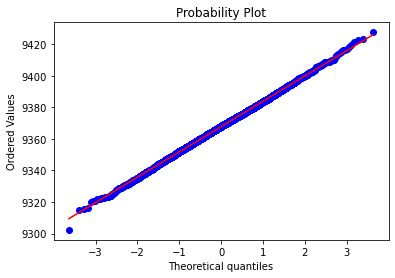

In [88]:
stats.probplot(bootstrap_means_male,dist='norm',plot=plt)
plt.show()

### we can see from the graph, bootstrap_means_male are in normal distribution

[]

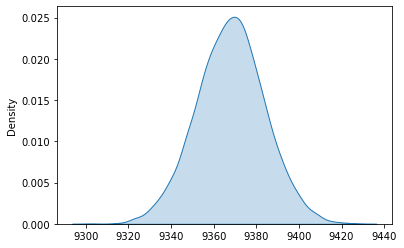

In [89]:
sns.kdeplot(bootstrap_means_male,fill=True)
plt.plot()

In [90]:
mean=np.mean(bootstrap_means_male)
mean

9367.807571558

In [91]:
std=np.std(bootstrap_means_male)
std

16.035944047809025

In [559]:
confidence=0.9
lower_male,upper_male=np.percentile(bootstrap_means_male,[5,95])
print('lower:',lower_male)
print('upper:',upper_male)

lower: 9342.164492
upper: 9393.494254000001


#### Confidance Interval of 90%lie within  the male's purchase  will lie in intervel [9342.16,9393.49]

[]

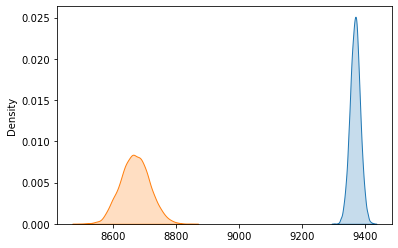

In [94]:
sns.kdeplot(bootstrap_means_male,fill=True)
sns.kdeplot(bootstrap_means_female,fill=True)
plt.plot()

#### > We can see that confidance intervel of purchase for male and female coustomers didnot overlap

## Distribution of purchase values for diffrent sample spaces

### For taking  sample size of maximum 1000.

### male

In [96]:
n_iteration=1000
bootstrap_means_male=[]
sample_size=1000
for i in range(n_iteration):
    s=resample(dmale['Purchase'],n_samples=sample_size)
    m=np.mean(s)
    bootstrap_means_male.append(m)

[]

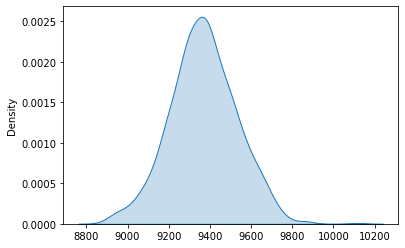

In [98]:
sns.kdeplot(bootstrap_means_male,fill=True)
plt.plot()

In [99]:
confidence=0.95
lower_male_95,upper_male_95=np.percentile(bootstrap_means_male,[2.5,97.5])
print('lower:',lower_male_95)
print('upper:',upper_male_95)

lower: 9041.381875
upper: 9681.39725


In [100]:
confidence=0.99
lower_male_99,upper_male_99=np.percentile(bootstrap_means_male,[.5,99.5])
print('lower:',lower_male_99)
print('upper:',upper_male_99)

lower: 8940.94532
upper: 9773.56192


### female

In [102]:
n_iteration=1000
bootstrap_means_female=[]
sample_size=1000
for i in range(n_iteration):
    s=resample(dfemale['Purchase'],n_samples=sample_size)
    m=np.mean(s)
    bootstrap_means_female.append(m)

[]

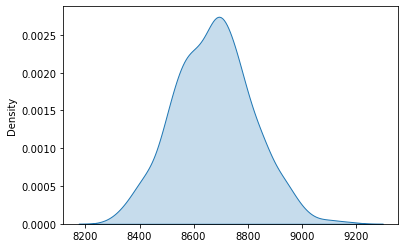

In [103]:
sns.kdeplot(bootstrap_means_female,fill=True)
plt.plot()

In [104]:
confidence=0.95
lower_female_95,upper_female_95=np.percentile(bootstrap_means_female,[5,95])
print('lower:',lower_female_95)
print('upper:',upper_female_95)

lower: 8429.3058
upper: 8921.87635


In [105]:
confidence=0.99
lower_female_99,upper_female_99=np.percentile(bootstrap_means_female,[.5,99.5])
print('lower:',lower_female_99)
print('upper:',upper_female_99)

lower: 8329.43321
upper: 9077.350955


[]

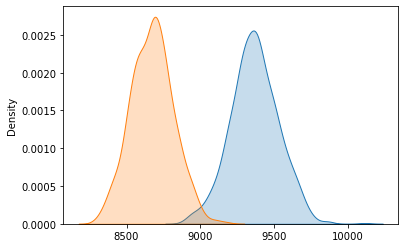

In [106]:
sns.kdeplot(bootstrap_means_male,fill=True)
sns.kdeplot(bootstrap_means_female,fill=True)
plt.plot()

#### > We can see that when we reduce the sample size to 1000 there is some overlapping for confidace intervel 99%
#### > We can conclude that for increse in sample space confidance intervel's width increses and overlaps

In [109]:
# creating 1st interval
intervalmale_95 = pd.Interval(lower_male_95, upper_male_95)
print('male interval is :' ,intervalmale_95)
  
# creating 2nd interval
intervalfemale_95 = pd.Interval(lower_female_95, upper_female_95)
  
# checking whether the intervals overlap
result = intervalmale_95.overlaps(intervalfemale_95)
print('female interval is :',intervalfemale_95)
str = 'yes' if result else 'no'
  
print('do the intervals overlap ? : '+str)

male interval is : (9041.381875, 9681.39725]
female interval is : (8429.3058, 8921.87635]
do the intervals overlap ? : no


In [111]:
# creating 1st interval
intervalmale_99 = pd.Interval(lower_male_99, upper_male_99)
print('male interval is :' ,intervalmale_99)
  
# creating 2nd interval
intervalfemale_99 = pd.Interval(lower_female_99, upper_female_99)
  
# checking whether the intervals overlap
result = intervalmale_99.overlaps(intervalfemale_99)
print('female interval is :',intervalfemale_99)
str = 'yes' if result else 'no'
  
print('do the intervals overlap ? : '+str)

male interval is : (8940.94532, 9773.56192]
female interval is : (8329.43321, 9077.350955]
do the intervals overlap ? : yes


### Perform the same activity for Married vs Unmarried 

### calculate the interval within which the average spending of 50 million Married customers may lie

In [112]:
married=da.loc[da.Marital_Status==1]
married

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871
10,1000005,P00251242,M,26-35,20,A,1,1,5,5254
...,...,...,...,...,...,...,...,...,...,...
550060,1006026,P00371644,M,36-45,6,C,1,1,20,494
550061,1006029,P00372445,F,26-35,1,C,1,1,20,599
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137


In [113]:
unmarried=da.loc[da.Marital_Status==0]
unmarried

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550056,1006022,P00375436,M,26-35,17,C,4+,0,20,254
550059,1006025,P00370853,F,26-35,1,B,1,0,19,48
550062,1006032,P00372445,M,46-50,7,A,3,0,20,473
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371


### married

[]

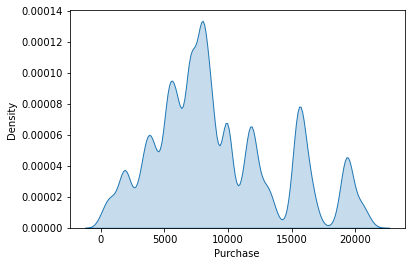

In [114]:
sns.kdeplot(married['Purchase'],fill=True)
plt.plot()

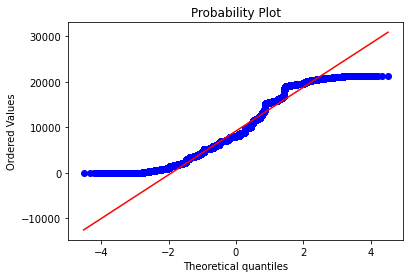

In [115]:
stats.probplot(married['Purchase'],dist='norm',plot=plt)
plt.show()

#### it is not a normal distribution curve. By central limit theoram find bootstrap_means_married

In [116]:
married.Purchase.count()

224149

In [117]:
n_iteration=1000
bootstrap_means_married=[]
sample_size=1000
for i in range(n_iteration):
    s=resample(married['Purchase'],n_samples=sample_size)
    m=np.mean(s)
    bootstrap_means_married.append(m)

In [118]:
bootstrap_means_married

[9212.093,
 9137.32,
 8947.765,
 8910.842,
 9040.802,
 9133.453,
 8917.777,
 9241.129,
 9261.344,
 9180.969,
 9303.5,
 9084.333,
 9089.118,
 9129.609,
 9191.921,
 9232.644,
 8965.689,
 9078.367,
 9384.82,
 9308.743,
 9471.718,
 9338.003,
 9309.958,
 9378.813,
 9337.866,
 9415.073,
 9131.277,
 9134.111,
 9006.121,
 9150.818,
 9305.511,
 9133.653,
 9327.467,
 9503.926,
 9342.294,
 9521.905,
 9182.628,
 9145.706,
 9279.946,
 9520.058,
 9228.268,
 9165.24,
 8992.4,
 9202.125,
 8888.846,
 9460.644,
 9074.443,
 8979.91,
 9490.447,
 9382.163,
 9130.823,
 9331.298,
 9376.377,
 9240.685,
 8808.486,
 8886.478,
 8859.632,
 9122.384,
 9214.558,
 9427.931,
 9103.308,
 9153.352,
 9194.211,
 9265.003,
 9219.78,
 9490.12,
 9232.587,
 9049.2,
 9096.949,
 9248.016,
 9519.863,
 9404.789,
 9177.524,
 9374.095,
 9254.512,
 9241.437,
 9159.287,
 9189.691,
 9204.786,
 8996.35,
 9267.495,
 9367.568,
 9121.338,
 9055.276,
 9270.456,
 9105.656,
 8990.195,
 9245.661,
 9326.759,
 8854.734,
 8790.397,
 9154.487,
 

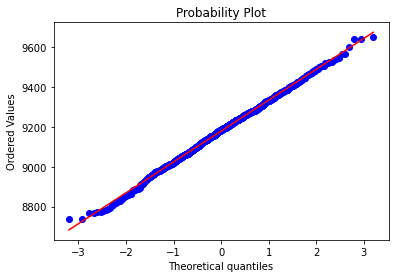

In [119]:
stats.probplot(bootstrap_means_married,dist='norm',plot=plt)
plt.show()

### we can see from the graph, bootstrap_means_married are in normal distribution

[]

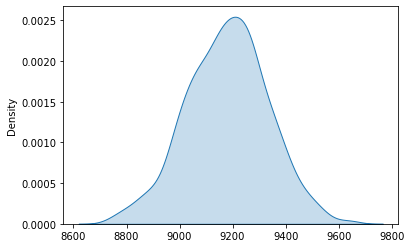

In [120]:
sns.kdeplot(bootstrap_means_married,fill=True)
plt.plot()

In [121]:
mean=np.mean(bootstrap_means_married)
mean

9178.506804999999

In [122]:
std=np.std(bootstrap_means_married)
std

154.5195055076057

In [123]:
confidence=0.9
lower_married,upper_married=np.percentile(bootstrap_means_married,[5,95])
print('lower:',lower_married)
print('upper:',upper_married)

lower: 8917.6204
upper: 9426.1127


#### Confidance Interval of 90%lie within the married's purchase  will lie in intervel [8917.62,9426.1]

### calculate the interval within which the average spending of 50 million Unmarried customers may lie

[]

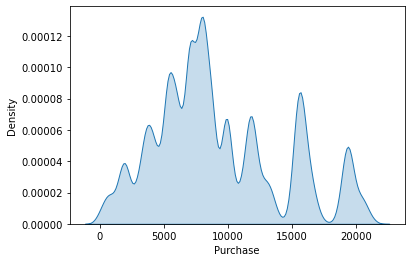

In [124]:
sns.kdeplot(unmarried['Purchase'],fill=True)
plt.plot()

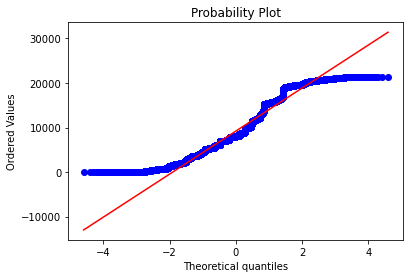

In [125]:
stats.probplot(unmarried['Purchase'],dist='norm',plot=plt)
plt.show()

#### it is not a normal distribution curve. By central limit theoram find bootstrap_means_unmarried

In [126]:
unmarried.Purchase.count()

323242

In [127]:
n_iteration=1000
bootstrap_means_unmarried=[]
sample_size=1000
for i in range(n_iteration):
    s=resample(unmarried['Purchase'],n_samples=sample_size)
    m=np.mean(s)
    bootstrap_means_unmarried.append(m)

In [128]:
bootstrap_means_unmarried

[9278.929,
 9356.377,
 8828.632,
 9218.393,
 9095.548,
 8845.292,
 9169.248,
 8970.244,
 9028.658,
 9257.861,
 9278.584,
 9074.96,
 9266.426,
 9078.175,
 9357.789,
 9217.523,
 9186.378,
 9302.69,
 9064.543,
 9465.997,
 9201.607,
 9197.918,
 9471.188,
 9029.251,
 9314.092,
 9318.783,
 9503.635,
 9324.338,
 9291.67,
 9032.216,
 9195.392,
 8987.621,
 9111.972,
 9244.042,
 9250.226,
 9308.462,
 9138.126,
 9218.246,
 9224.583,
 9102.171,
 9441.854,
 9356.293,
 9064.002,
 9077.856,
 9359.711,
 9103.394,
 9048.678,
 8933.633,
 9319.624,
 9127.777,
 9211.78,
 9295.767,
 9101.837,
 9335.103,
 9139.743,
 9358.219,
 8924.563,
 9462.786,
 9254.531,
 9271.113,
 9422.337,
 9278.491,
 9002.082,
 9289.628,
 9664.007,
 9219.262,
 8888.431,
 9010.943,
 9336.864,
 8759.971,
 9412.281,
 9171.483,
 9104.723,
 9307.244,
 9240.428,
 9223.43,
 9032.789,
 9377.525,
 9211.236,
 9197.253,
 9081.302,
 8774.061,
 9181.398,
 9109.606,
 9519.442,
 8912.108,
 9184.699,
 9264.425,
 9070.612,
 9375.774,
 9166.439,
 933

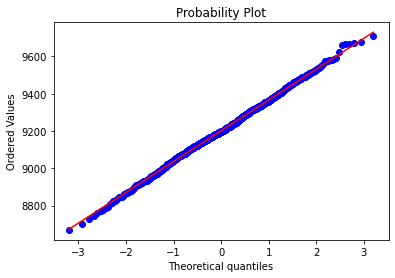

In [129]:
stats.probplot(bootstrap_means_unmarried,dist='norm',plot=plt)
plt.show()

### we can see from the graph, bootstrap_means_unmarried are in normal distribution

[]

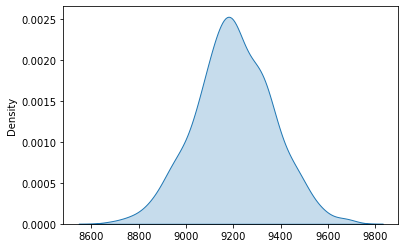

In [130]:
sns.kdeplot(bootstrap_means_unmarried,fill=True)
plt.plot()

In [131]:
mean=np.mean(bootstrap_means_unmarried)
mean

9201.349132

In [132]:
std=np.std(bootstrap_means_unmarried)
std

164.76165311355848

In [133]:
confidence=0.9
lower_unmarried,upper_unmarried=np.percentile(bootstrap_means_unmarried,[5,95])
print('lower:',lower_unmarried)
print('upper:',upper_unmarried)

lower: 8928.49295
upper: 9476.981199999998


#### Confidance Interval of 90%lie within  the unmarried's purchase  will lie in intervel [8928.49,9476.98]

### Find confidance intervel of Purchase values of married and unmarried people overlaps  

[]

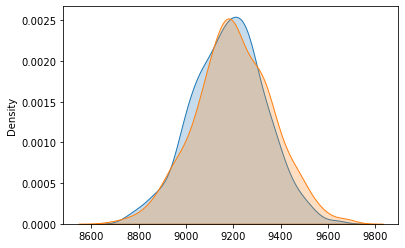

In [134]:
sns.kdeplot(bootstrap_means_married,fill=True)
sns.kdeplot(bootstrap_means_unmarried,fill=True)
plt.plot()

#### >Confidance intervel of both married and unmarried are intersecting each other

#### > Two statistics have non-overlapping confidence intervals, they are necessarily significantly different but if they have overlapping confidence intervals, it is not necessarily true that they are not significantly different.


### calculate the interval within which the average spending of 50 million Diffrent age group may lie

In [136]:
Age_0_to_17=da.loc[da.Age=='0-17']
Age_0_to_17

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
85,1000019,P00112542,M,0-17,10,A,3,0,1,7746
...,...,...,...,...,...,...,...,...,...,...
549904,1005803,P00375436,M,0-17,10,C,1,0,20,256
550012,1005953,P00370853,M,0-17,10,B,0,0,19,26
550024,1005973,P00370293,M,0-17,10,C,4+,0,19,12
550035,1005989,P00370853,F,0-17,10,C,3,0,19,61


In [137]:
Age_0_to_17.Purchase.count()

15032

In [138]:
n_iteration=1000
bootstrap_means_Age_0_to_17=[]
sample_size=1000
for i in range(n_iteration):
    s=resample(Age_0_to_17['Purchase'],n_samples=sample_size)
    m=np.mean(s)
    bootstrap_means_Age_0_to_17.append(m)
bootstrap_means_Age_0_to_17

[9084.081,
 8688.465,
 8947.005,
 9103.958,
 8769.214,
 8803.331,
 8621.993,
 8998.126,
 9000.081,
 8839.114,
 8918.291,
 8866.284,
 8780.099,
 8880.996,
 8669.721,
 8926.478,
 8813.802,
 8888.185,
 8811.718,
 8596.528,
 8951.919,
 8717.673,
 9148.047,
 8693.913,
 8774.026,
 8973.042,
 8720.408,
 8699.388,
 8829.913,
 8686.582,
 8687.751,
 8882.071,
 8713.677,
 8791.736,
 8848.588,
 8634.394,
 8838.915,
 8691.552,
 9058.995,
 8766.999,
 8731.33,
 8723.641,
 8927.857,
 8855.406,
 8770.398,
 8747.332,
 8589.75,
 8882.205,
 8996.451,
 8740.966,
 8847.374,
 8955.083,
 8934.64,
 8877.346,
 8778.298,
 9179.884,
 8909.068,
 9017.804,
 9114.032,
 8828.361,
 8736.75,
 8862.339,
 8657.193,
 8661.514,
 8741.958,
 9022.253,
 8663.32,
 8673.568,
 8980.35,
 8857.618,
 8714.665,
 9042.754,
 8854.472,
 8815.346,
 9136.579,
 8723.614,
 8813.971,
 8759.386,
 9033.448,
 8902.548,
 8934.974,
 9012.217,
 9222.506,
 8794.296,
 8836.795,
 9042.363,
 8730.687,
 8782.096,
 8888.704,
 9079.472,
 8902.495,
 8835

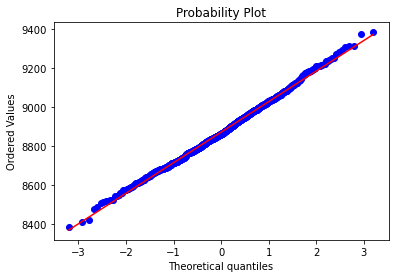

In [139]:
stats.probplot(bootstrap_means_Age_0_to_17,dist='norm',plot=plt)
plt.show()

#### we can see from the graph, bootstrap_means_Age_0_to_17 are in normal distribution

[]

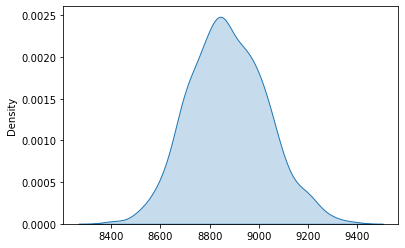

In [140]:
sns.kdeplot(bootstrap_means_Age_0_to_17,fill=True)
plt.plot()

In [141]:
mean=np.mean(bootstrap_means_Age_0_to_17)
mean

8873.189686

In [142]:
std=np.std(bootstrap_means_Age_0_to_17)
std

156.4451861256888

In [143]:
confidence=0.99
lower_Age_0_to_17,upper_Age_0_to_17=np.percentile(bootstrap_means_Age_0_to_17,[.5,99.5])
print('lower:',lower_Age_0_to_17)
print('upper:',upper_Age_0_to_17)

lower: 8510.74988
upper: 9293.412675


#### Confidance Interval of 99%lie within  the male's purchase  will lie in intervel [8510.74,9293.41]

### Age 18-25

In [146]:
Age_18_to_25=da.loc[da.Age=='18-25']
Age_18_to_25


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
70,1000018,P00366542,F,18-25,3,B,3,0,5,1780
71,1000018,P00190742,F,18-25,3,B,3,0,3,10754
72,1000018,P00151842,F,18-25,3,B,3,0,4,2802
73,1000018,P00112642,F,18-25,3,B,3,0,1,19473
74,1000018,P00118442,F,18-25,3,B,3,0,1,19672
...,...,...,...,...,...,...,...,...,...,...
550000,1005936,P00370293,M,18-25,4,C,4+,0,19,14
550015,1005957,P00372445,M,18-25,20,B,1,1,20,477
550017,1005959,P00371644,F,18-25,4,B,2,1,20,363
550020,1005964,P00370293,M,18-25,5,B,1,0,19,36


In [147]:
Age_18_to_25.Purchase.count()


99334

In [148]:
n_iteration=1000
bootstrap_means_Age_18_to_25=[]
sample_size=1000
for i in range(n_iteration):
    s=resample(Age_18_to_25['Purchase'],n_samples=sample_size)
    m=np.mean(s)
    bootstrap_means_Age_18_to_25.append(m)
bootstrap_means_Age_18_to_25


[9132.954,
 9098.717,
 9073.007,
 9296.913,
 9052.408,
 9102.423,
 9192.413,
 9303.657,
 9063.553,
 9228.436,
 9002.668,
 9340.444,
 9110.159,
 8840.74,
 9111.779,
 9216.003,
 9354.143,
 9305.868,
 8961.946,
 9250.167,
 9083.217,
 9256.443,
 9162.528,
 8865.942,
 9487.558,
 9082.495,
 9220.767,
 9006.399,
 9093.676,
 9344.62,
 9014.553,
 9026.873,
 9077.458,
 9326.617,
 8926.742,
 9062.252,
 9067.835,
 9135.46,
 9210.809,
 8872.996,
 9299.683,
 9196.234,
 9033.81,
 9011.525,
 9030.081,
 9245.141,
 9139.476,
 9173.541,
 9076.702,
 8841.783,
 9041.851,
 9262.097,
 9186.445,
 9352.27,
 8954.272,
 9195.166,
 9188.615,
 9237.605,
 9299.972,
 9201.052,
 9265.352,
 9186.994,
 8974.934,
 9143.166,
 9232.614,
 9085.752,
 9331.528,
 9324.578,
 9265.414,
 9196.259,
 8999.664,
 9468.098,
 9447.531,
 9229.035,
 9179.24,
 9473.622,
 9179.956,
 9059.148,
 9009.211,
 9365.411,
 9201.139,
 9173.0,
 8948.48,
 8744.901,
 9417.339,
 9343.487,
 9416.465,
 9103.674,
 8948.414,
 8831.324,
 9179.759,
 9030.22

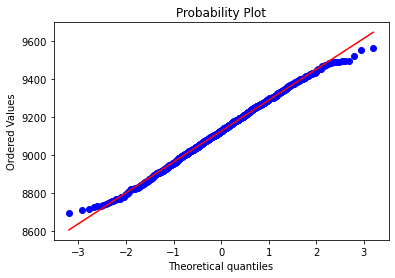

In [149]:
stats.probplot(bootstrap_means_Age_18_to_25,dist='norm',plot=plt)
plt.show()


### we can see from the graph, bootstrap_means_Age_18_to_25 are in normal distribution


[]

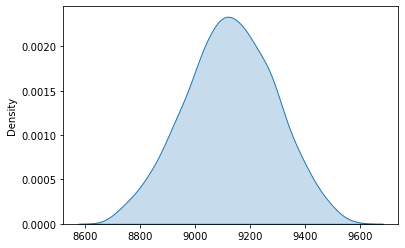

In [150]:
sns.kdeplot(bootstrap_means_Age_18_to_25,fill=True)
plt.plot()


In [151]:
mean=np.mean(bootstrap_means_Age_18_to_25)
mean


9127.275335999999

In [152]:
std=np.std(bootstrap_means_Age_18_to_25)
std


162.19137222593287

In [153]:
confidence=0.99
lower_Age_18_to_25,upper_Age_18_to_25=np.percentile(bootstrap_means_Age_18_to_25,[.5,99.5])
print('lower:',lower_Age_18_to_25)
print('upper:',upper_Age_18_to_25)


lower: 8733.967480000001
upper: 9493.500699999999


#### Confidance Interval of 99%lie within  the male's purchase  will lie in intervel [8733.96,9493.50]

### Age 26-35


In [156]:
Age_26_to_35=da.loc[da.Age=='26-35']
Age_26_to_35



,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871
10,1000005,P00251242,M,26-35,20,A,1,1,5,5254
11,1000005,P00014542,M,26-35,20,A,1,1,8,3957
12,1000005,P00031342,M,26-35,20,A,1,1,8,6073
...,...,...,...,...,...,...,...,...,...,...
550058,1006024,P00372445,M,26-35,12,A,0,1,20,121
550059,1006025,P00370853,F,26-35,1,B,1,0,19,48
550061,1006029,P00372445,F,26-35,1,C,1,1,20,599
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371


In [157]:
Age_26_to_35.Purchase.count()


218661

In [158]:
n_iteration=1000
bootstrap_means_Age_26_to_35=[]
sample_size=1000
for i in range(n_iteration):
    s=resample(Age_26_to_35['Purchase'],n_samples=sample_size)
    m=np.mean(s)
    bootstrap_means_Age_26_to_35.append(m)
bootstrap_means_Age_26_to_35


[9038.945,
 9402.771,
 9090.625,
 9274.442,
 9022.799,
 9097.018,
 9439.605,
 9048.595,
 9274.876,
 9330.567,
 9488.865,
 9305.803,
 9119.589,
 9269.069,
 8880.541,
 9377.711,
 8976.61,
 9132.352,
 9316.239,
 9345.332,
 9194.585,
 9017.195,
 9399.852,
 9394.658,
 9223.402,
 9193.592,
 9215.577,
 9015.295,
 9204.782,
 9181.673,
 9342.136,
 9443.193,
 9345.745,
 9188.089,
 8871.909,
 9536.051,
 8854.408,
 9146.762,
 9110.893,
 8886.762,
 8822.439,
 9472.735,
 9432.044,
 9176.462,
 9018.978,
 9307.199,
 9139.724,
 9207.048,
 8976.348,
 9454.393,
 9220.8,
 9354.81,
 9247.616,
 8907.587,
 9263.025,
 9107.855,
 9256.189,
 9188.336,
 9006.45,
 8927.778,
 9268.707,
 9178.985,
 9167.547,
 9122.511,
 9012.028,
 9278.288,
 9292.17,
 9043.293,
 8780.05,
 9345.149,
 9381.63,
 9450.901,
 9363.982,
 9212.043,
 9055.327,
 9019.919,
 9164.212,
 9059.245,
 9007.168,
 9324.592,
 9223.569,
 9129.248,
 9248.684,
 9257.408,
 9452.717,
 9112.789,
 9039.662,
 9310.345,
 9268.981,
 9359.003,
 9648.948,
 9071.8

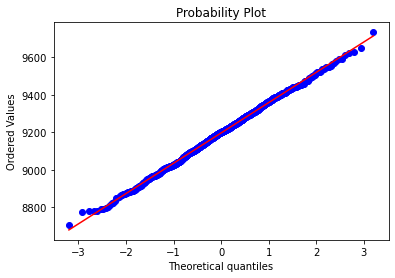

In [160]:
stats.probplot(bootstrap_means_Age_26_to_35,dist='norm',plot=plt)
plt.show()

### we can see from the graph, bootstrap_means_Age_26_to_35 are in normal distribution


[]

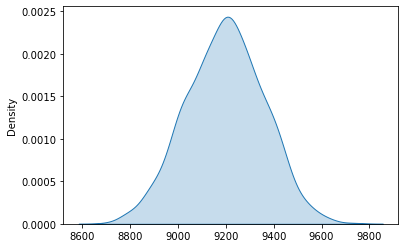

In [161]:
sns.kdeplot(bootstrap_means_Age_26_to_35,fill=True)
plt.plot()


In [162]:
mean=np.mean(bootstrap_means_Age_26_to_35)
mean


9196.318946

In [163]:
std=np.std(bootstrap_means_Age_26_to_35)
std


161.62257232976182

In [ ]:
confidence=0.99
lower_Age_26_to_35,upper_Age_18_to_25=np.percentile(bootstrap_means_Age_26_to_35,[.5,99.5])
print('lower:',lower_Age_26_to_35)
print('upper:',upper_Age_26_to_35)


#### Confidance Interval of 99%lie within  the male's purchase  will lie in intervel [8449.41,9294.26]

### Age 36-50


In [174]:
Age_36_to_50=da.loc[(da.Age=='36-45')|(da.Age=='46-50')]
Age_36_to_50

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
18,1000007,P00036842,M,36-45,1,B,1,1,1,11788
29,1000010,P00085942,F,36-45,1,B,4+,1,2,16352
...,...,...,...,...,...,...,...,...,...,...
550053,1006017,P00371644,F,36-45,7,B,1,0,20,371
550054,1006018,P00370293,M,36-45,1,C,3,0,19,60
550060,1006026,P00371644,M,36-45,6,C,1,1,20,494
550062,1006032,P00372445,M,46-50,7,A,3,0,20,473


In [175]:
Age_36_to_50.Purchase.count()


154851

In [176]:
n_iteration=1000
bootstrap_means_Age_36_to_50=[]
sample_size=1000
for i in range(n_iteration):
    s=resample(Age_36_to_50['Purchase'],n_samples=sample_size)
    m=np.mean(s)
    bootstrap_means_Age_36_to_50.append(m)
bootstrap_means_Age_36_to_50


[9424.602,
 9170.172,
 9369.649,
 9323.102,
 9139.02,
 9064.865,
 9269.813,
 9448.386,
 9210.028,
 9121.114,
 9537.133,
 9153.514,
 9537.185,
 9116.242,
 9218.196,
 9183.491,
 9138.545,
 9037.152,
 9024.973,
 8959.789,
 9147.617,
 9040.103,
 8923.845,
 9316.91,
 9100.471,
 9137.764,
 9136.072,
 9388.913,
 9274.733,
 9090.304,
 9057.516,
 9440.928,
 9126.724,
 9333.201,
 9202.844,
 9160.916,
 9426.006,
 9279.284,
 9511.272,
 9025.735,
 9323.521,
 8990.114,
 9230.236,
 9239.669,
 9183.836,
 9231.365,
 9160.703,
 9353.582,
 9334.144,
 9413.045,
 9057.624,
 9170.543,
 9257.318,
 9261.027,
 9392.735,
 9175.569,
 9439.241,
 9304.486,
 9297.861,
 9097.019,
 9173.057,
 9404.201,
 9048.277,
 9380.941,
 9335.48,
 9424.101,
 9062.62,
 9448.234,
 9464.996,
 9214.335,
 9286.516,
 9263.426,
 9390.116,
 9214.735,
 9150.807,
 8799.415,
 9178.045,
 9201.944,
 9235.883,
 9185.86,
 9271.773,
 9235.072,
 9122.299,
 9284.997,
 9327.82,
 9115.44,
 9402.201,
 8991.298,
 9329.81,
 9170.427,
 9172.389,
 9385.9

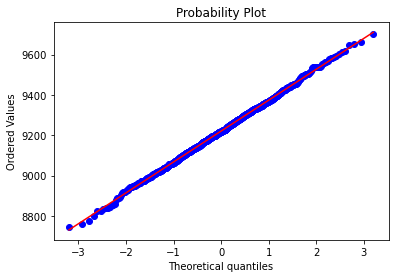

In [177]:
stats.probplot(bootstrap_means_Age_36_to_50,dist='norm',plot=plt)
plt.show()


### we can see from the graph, bootstrap_means_Age_36_to_50 are in normal distribution


[]

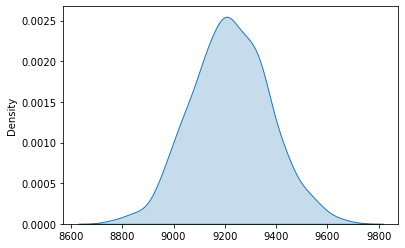

In [179]:
sns.kdeplot(bootstrap_means_Age_36_to_50,fill=True)
plt.plot()


In [180]:
mean=np.mean(bootstrap_means_Age_36_to_50)
mean


9220.718714

In [181]:
std=np.std(bootstrap_means_Age_36_to_50)
std


152.7531560052433

In [182]:
confidence=0.99
lower_Age_36_to_50,upper_Age_36_to_50=np.percentile(bootstrap_means_Age_36_to_50,[.5,99.5])
print('lower:',lower_Age_36_to_50)
print('upper:',upper_Age_36_to_50)


lower: 8823.42354
upper: 9614.246395


#### Confidance Interval of 99%lie within  the male's purchase  will lie in intervel [8823.42,9614.24]

### Age 51+

In [184]:
Age_51_plus=da.loc[(da.Age=='51-55')|(da.Age=='55+')]
Age_51_plus

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
14,1000006,P00231342,F,51-55,9,A,1,0,5,5378
15,1000006,P00190242,F,51-55,9,A,1,0,4,2079
16,1000006,P0096642,F,51-55,9,A,1,0,2,13055
17,1000006,P00058442,F,51-55,9,A,1,0,5,8851
...,...,...,...,...,...,...,...,...,...,...
550030,1005980,P00372445,M,55+,1,C,3,0,20,376
550037,1005993,P00370293,F,51-55,20,C,1,1,19,62
550042,1006002,P00371644,M,51-55,0,C,1,1,20,243
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368


In [185]:
Age_51_plus.Purchase.count()

59513

In [186]:
n_iteration=1000
bootstrap_means_Age_51_plus=[]
sample_size=1000
for i in range(n_iteration):
    s=resample(Age_51_plus['Purchase'],n_samples=sample_size)
    m=np.mean(s)
    bootstrap_means_Age_51_plus.append(m)
bootstrap_means_Age_51_plus

[9216.464,
 9193.792,
 9401.811,
 9550.287,
 9510.042,
 9394.797,
 9266.68,
 9424.022,
 9314.304,
 9208.351,
 9359.15,
 9279.814,
 9224.629,
 8939.3,
 9266.951,
 9348.822,
 9488.46,
 9284.058,
 9559.482,
 9339.941,
 9310.443,
 9303.815,
 9294.847,
 9302.429,
 8858.108,
 9262.749,
 9320.218,
 9339.72,
 9406.996,
 9344.579,
 9394.716,
 9170.201,
 9241.335,
 9405.479,
 9464.172,
 9104.755,
 9420.469,
 9315.058,
 9273.485,
 9452.209,
 9104.51,
 9391.93,
 9174.025,
 9450.566,
 9518.045,
 9376.294,
 9435.748,
 9493.748,
 9640.721,
 9565.991,
 9484.227,
 9636.821,
 9261.807,
 9210.252,
 9228.405,
 9258.124,
 9357.692,
 9571.095,
 9187.966,
 9506.762,
 9336.286,
 9085.65,
 9176.457,
 9594.396,
 9288.609,
 9365.566,
 9316.797,
 9162.751,
 9269.818,
 9606.671,
 9623.862,
 9281.529,
 9260.848,
 9218.99,
 9316.074,
 9413.148,
 9212.292,
 9157.635,
 9227.485,
 9303.058,
 9474.118,
 9316.657,
 9338.429,
 9507.722,
 9225.201,
 9205.547,
 9276.265,
 9153.613,
 9181.852,
 9240.218,
 9245.513,
 9463.689

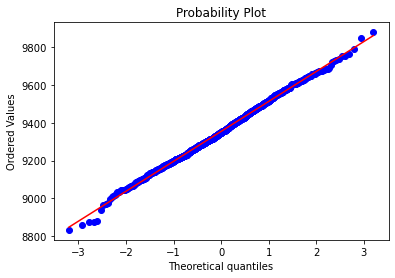

In [188]:
stats.probplot(bootstrap_means_Age_51_plus,dist='norm',plot=plt)
plt.show()

### we can see from the graph, bootstrap_means_Age_51_plus are in normal distribution

[]

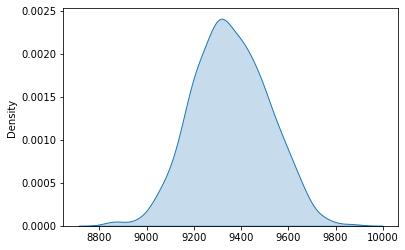

In [189]:
sns.kdeplot(bootstrap_means_Age_51_plus,fill=True)
plt.plot()

In [190]:
mean=np.mean(bootstrap_means_Age_51_plus)
mean

9354.652023

In [200]:
std=np.std(bootstrap_means_Age_51_plus)
std

158.68094874511706

In [192]:
confidence=0.99
lower_Age_51_plus,upper_Age_51_plus=np.percentile(bootstrap_means_Age_51_plus,[.5,99.5])
print('lower:',lower_Age_51_plus)
print('upper:',upper_Age_51_plus)

lower: 8938.98764
upper: 9752.744540000002


#### Confidance Interval of 99% lie within  the male's purchase  will lie in intervel [8938.9,9752.74]

### Find confidance intervel of Purchase values of diffrent age groups overlap

In [217]:
kde = pd.DataFrame(list(zip(bootstrap_means_Age_0_to_17,bootstrap_means_Age_18_to_25,bootstrap_means_Age_26_to_35,
       bootstrap_means_Age_36_to_50,bootstrap_means_Age_51_plus)), 
                   columns=['Age_0_to_17', 'Age_18_to_25', 'Age_26_to_35','Age_36_to_50','Age_51_plus'])
kde

,Age_0_to_17,Age_18_to_25,Age_26_to_35,Age_36_to_50,Age_51_plus
0,9084.081,9132.954,9038.945,9424.602,9216.464
1,8688.465,9098.717,9402.771,9170.172,9193.792
2,8947.005,9073.007,9090.625,9369.649,9401.811
3,9103.958,9296.913,9274.442,9323.102,9550.287
4,8769.214,9052.408,9022.799,9139.020,9510.042
...,...,...,...,...,...
995,8892.176,9188.861,9487.696,9221.363,9473.237
996,9003.952,8982.457,9181.594,9136.517,9073.512
997,8734.771,9156.331,8945.465,9124.126,9058.705
998,8773.718,9284.952,9274.127,9425.489,9573.010


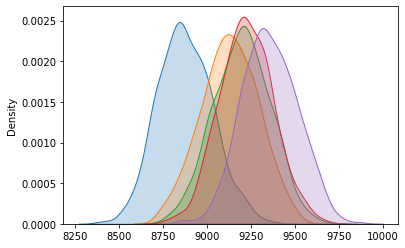

In [517]:
sns.kdeplot(bootstrap_means_Age_0_to_17,fill=True)
sns.kdeplot(bootstrap_means_Age_18_to_25,fill=True)
sns.kdeplot(bootstrap_means_Age_26_to_35,fill=True)
sns.kdeplot(bootstrap_means_Age_36_to_50,fill=True)
sns.kdeplot(bootstrap_means_Age_51_plus,fill=True)
plt.show()

#### confidance intervel of Purchase values of diffrent age groups are overlapping each other

### Find the purchase mean for each genter for Stay_In_Current_City_Years

In [273]:
x=da.groupby(['Stay_In_Current_City_Years','Gender'])['Purchase'].mean().to_frame('Purchase_mean').reset_index()
x

,Stay_In_Current_City_Years,Gender,Purchase_mean
0,0,F,8536.689690
1,0,M,9282.385536
2,1,F,8706.782874
3,1,M,9349.422331
4,2,F,8695.321982
5,2,M,9435.340590
6,3,F,8619.423711
7,3,M,9422.625039
8,4,F,8731.921744
9,4,M,9343.149742


In [274]:
s=x.pivot('Stay_In_Current_City_Years','Gender','Purchase_mean').reset_index()
x.pivot('Stay_In_Current_City_Years','Gender','Purchase_mean')

Gender,F,M
Stay_In_Current_City_Years,,
0,8536.689690,9282.385536
1,8706.782874,9349.422331
2,8695.321982,9435.340590
3,8619.423711,9422.625039
4,8731.921744,9343.149742


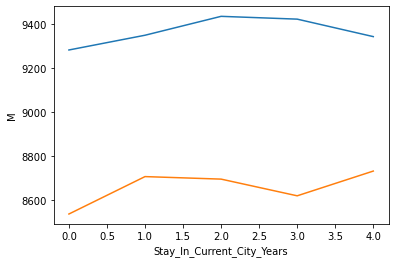

In [275]:
sns.lineplot(x= 'Stay_In_Current_City_Years', y= 'M', data = s)
sns.lineplot(x= 'Stay_In_Current_City_Years', y= 'F', data = s)
plt.show()

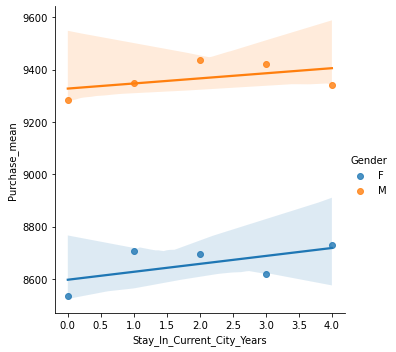

In [280]:
sns.lmplot(x = 'Stay_In_Current_City_Years', y= 'Purchase_mean', data = x,hue='Gender')
plt.show()

#### > purchase mean of male and female are  incresing with stay in current city increses

### Find the purchase count for each Occupation level for diffrent citys

In [288]:
x=pd.crosstab(da.Occupation,da.City_Category,margins=True).reset_index()
x.sort_values('All',ascending=False)

City_Category,Occupation,A,B,C,All
21,All,147036,230114,170241,547391
4,4,24117,29739,18184,72040
0,0,18778,29712,20820,69310
7,7,16154,22904,19817,58875
1,1,12751,19658,14765,47174
17,17,8134,16043,15678,39855
20,20,12679,14308,6368,33355
12,12,7042,13103,10850,30995
14,14,7678,11224,8271,27173
2,2,9187,11305,5943,26435


#### - Occupation 4,0,7 are the top 3 most purchasing category
#### - Occupation 18,9,8 are the least 3 most purchasing category
#### - City category B is the most no of purchasing city
#### - City category A is the least number of purchasing city

### Find the purchase mean for each Occupation level for diffrent citys

In [299]:
x=da.groupby(['City_Category','Gender'])['Purchase'].mean().to_frame('Purchase_mean').reset_index()
x

,City_Category,Gender,Purchase_mean
0,A,F,8516.900287
1,A,M,8950.114824
2,B,F,8483.125703
3,B,M,9287.831201
4,C,F,9058.245415
5,C,M,9838.610504


In [295]:
s=x.pivot('City_Category','Gender','Purchase_mean').reset_index()
x.pivot('City_Category','Gender','Purchase_mean')

Gender,F,M
City_Category,,
A,8516.900287,8950.114824
B,8483.125703,9287.831201
C,9058.245415,9838.610504


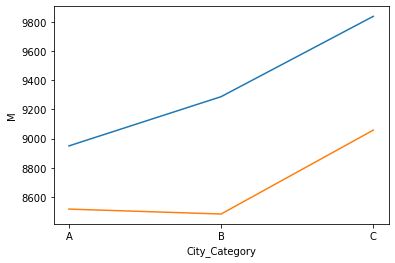

In [296]:
sns.lineplot(x= 'City_Category', y= 'M', data = s)
sns.lineplot(x= 'City_Category', y= 'F', data = s)
plt.show()

#### > City C is the most purchase mean compare to other citys
#### > For male and female, purchase mean high is male in every city

### Find the purchase mean for each citys for each genter 

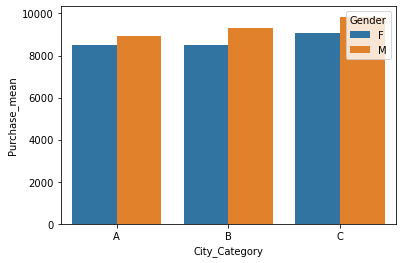

In [300]:
sns.barplot(x = 'City_Category', y = 'Purchase_mean', data = x, hue = 'Gender')
plt.show()

#### Male is the most money spending Genter in each City  

### How purchase value varies for diffrent citys

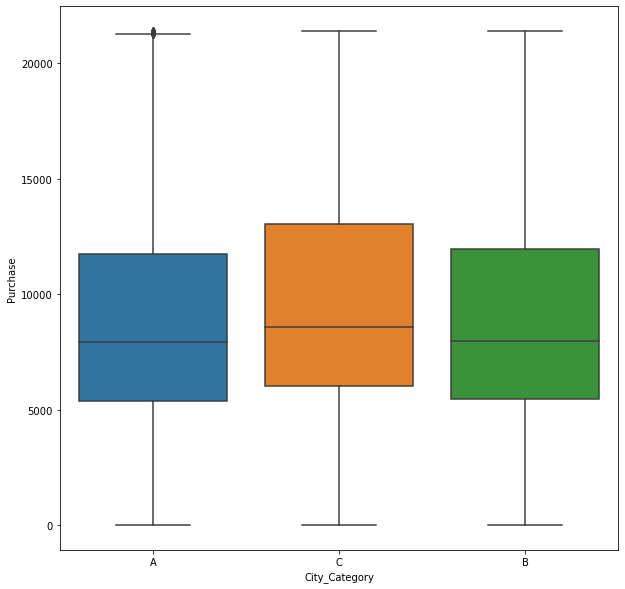

In [297]:
plt.figure(figsize=(10,10))
sns.boxplot(x = 'City_Category', y = 'Purchase', data = da)
plt.show()

#### Median of most money spending City catogery is C, and least is A
#### Almost all city has purchase values in betwwen 0 to 25k

### Most purchasing product category in each genter

In [304]:
x=da.groupby(['Gender'])['Product_Category'].value_counts().to_frame('purchase_count').reset_index()
x

,Gender,Product_Category,purchase_count
0,F,5,41961
1,F,8,33558
2,F,1,24831
3,F,3,6006
4,F,2,5658
5,F,11,4739
6,F,6,4559
7,F,4,3639
8,F,16,2402
9,F,12,1532


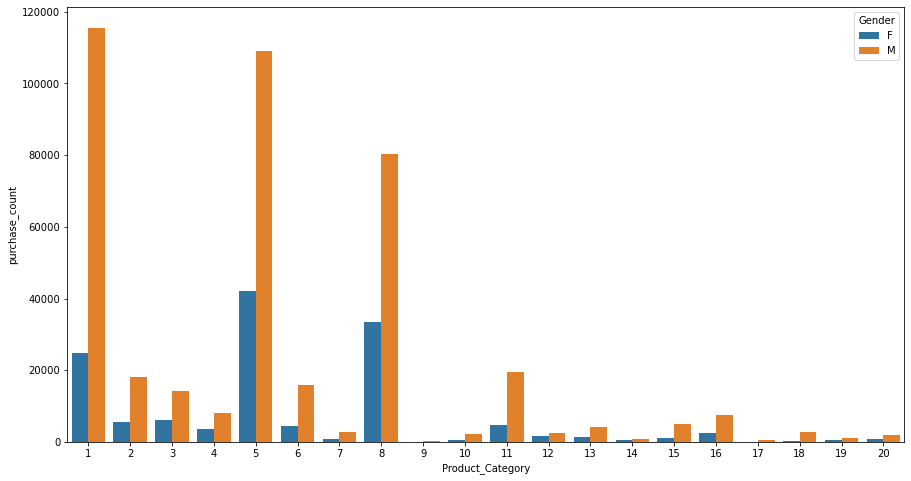

In [306]:
plt.figure(figsize=(15,8))
sns.barplot(x = 'Product_Category', y = 'purchase_count', data = x, hue = 'Gender')
plt.show()

#### - 1,5,8 are the most purchasing product category for both males and females. Males count is high comapre to female 
#### - For female,most purchasing top 3 product category are in order 8,5 and 1 
#### - For male,most purchasing top 3 product category are in order 1,5 and 8
#### - 9 is the least purchasing product category for both males and females

## Top purchasing product category for married and unmarried people

In [357]:
x=da.groupby(['Marital_Status'])['Product_Category'].value_counts().to_frame('purchase_count').reset_index()
x

,Marital_Status,Product_Category,purchase_count
0,Married,5,61277
1,Married,1,56003
2,Married,8,48514
3,Married,2,9726
4,Married,11,9619
5,Married,6,8327
6,Married,3,7854
7,Married,4,4576
8,Married,16,4115
9,Married,15,2526


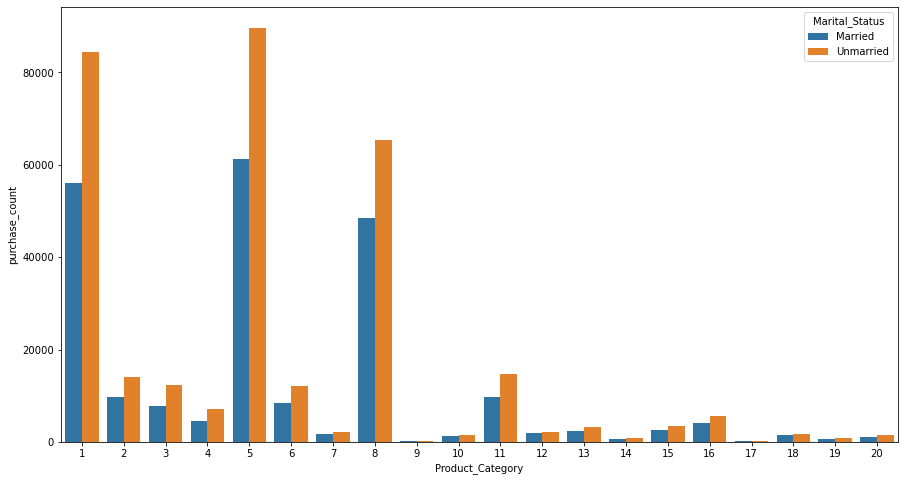

In [358]:
plt.figure(figsize=(15,8))
sns.barplot(x = 'Product_Category', y = 'purchase_count', data = x, hue = 'Marital_Status')
plt.show()

#### - 1,5,8 are the most purchasing product category for both married and unmarried people. Males count is high comapre to female 
#### - For female,most purchasing top 3 product category are in order 8,5 and 1 
#### - For male,most purchasing top 3 product category are in order 1,5 and 8
#### - 9 is the least purchasing product category for both males and females

### Find the most expensive product category

In [315]:
x=da.groupby(['Product_Category','Gender'])['Purchase'].mean().to_frame('Purchase_mean').reset_index()
x=x.sort_values('Purchase_mean')
x

,Product_Category,Gender,Purchase_mean
37,19,M,36.793403
36,19,F,37.676275
39,20,M,370.052545
38,20,F,371.564315
25,13,M,718.306092
24,13,F,733.846785
23,12,M,1305.154037
22,12,F,1422.909269
7,4,M,2273.512694
6,4,F,2454.851882


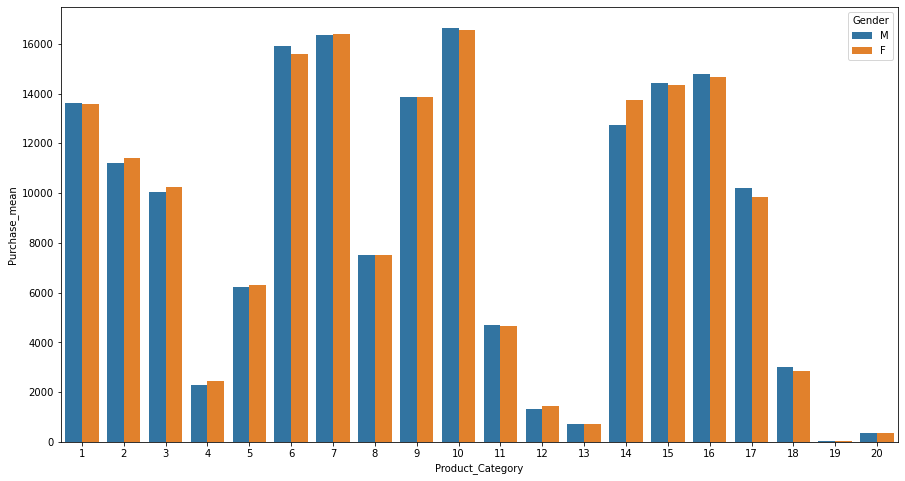

In [312]:
plt.figure(figsize=(15,8))
sns.barplot(x = 'Product_Category', y = 'Purchase_mean', data = x, hue = 'Gender')
plt.show()

#### Most 5 expensive product category are 10,7,6,16,15,9
#### 5 Least expensive product category are 19,20,13,12,4

## Top 3 selling product price range 

In [318]:
Top_3=da[(da['Product_Category']==1)|(da['Product_Category']==5)|(da['Product_Category']==8)]
Top_3

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
4,1000002,P00285442,M,55+,16,C,4,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
...,...,...,...,...,...,...,...,...,...,...
545910,1006040,P00184342,M,26-35,6,B,2,0,8,9855
545911,1006040,P00193142,M,26-35,6,B,2,0,5,1962
545912,1006040,P00029842,M,26-35,6,B,2,0,8,7852
545913,1006040,P00106042,M,26-35,6,B,2,0,5,7159


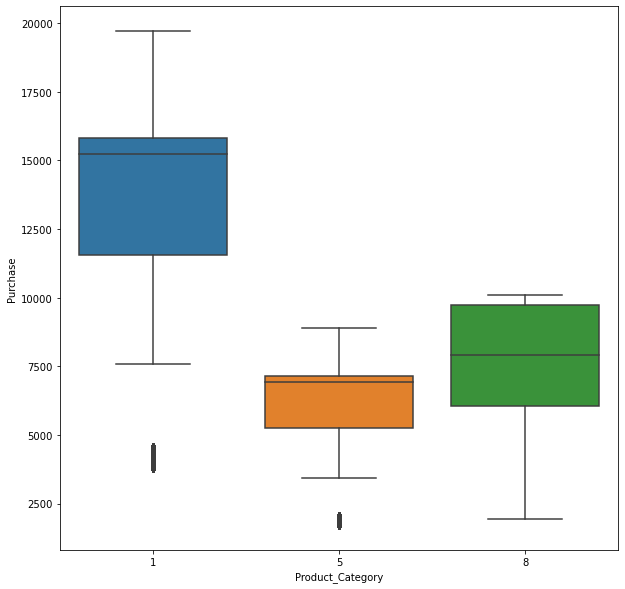

In [319]:
plt.figure(figsize=(10,10))
sns.boxplot(x = 'Product_Category', y = 'Purchase', data = Top_3)
plt.show()

#### - From the top 3 selling products product category 1 is the most expensive ,and 5 is the least
#### - Product category 1's price is in range of 7500 to 20000
#### - Product category 5's price is in range of 3500 to 90000
#### - Product category 8's price is in range of 2000 to 10000

### Age category vs purchase count

In [359]:
da.groupby(['Gender','Age'])['Purchase'].count()

Gender  Age  
F       0-17       5062
        18-25     24582
        26-35     50560
        36-45     27036
        46-50     13136
        51-55      9815
        55+        5029
M       0-17       9970
        18-25     74752
        26-35    168101
        36-45     82373
        46-50     32306
        51-55     28376
        55+       16293
Name: Purchase, dtype: int64

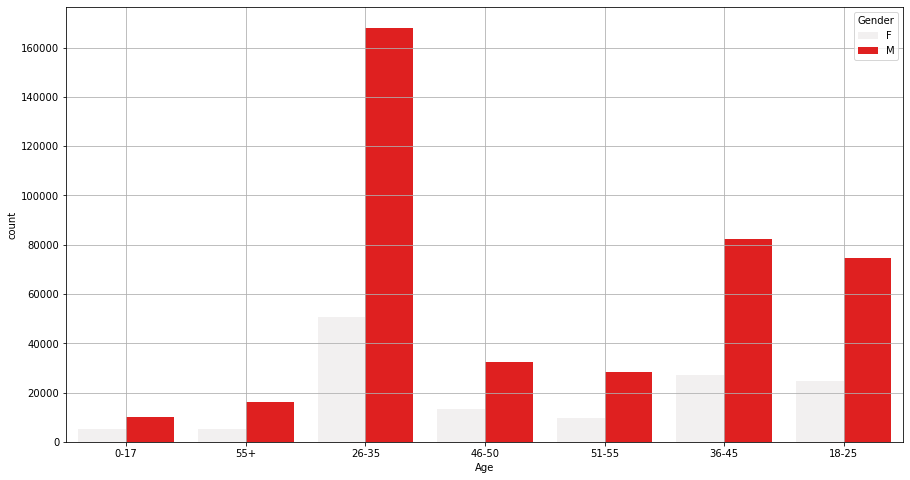

In [371]:
plt.figure(figsize=(15,8))
sns.countplot(x = 'Age', data = da, hue = 'Gender',color='red')
plt.grid()
plt.show()

#### most number of purchases are in between 26 to 35 year old people

<AxesSubplot:ylabel='Purchase'>

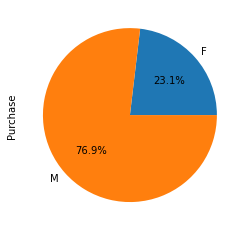

In [364]:
da[da['Age']=='26-35'].groupby('Gender')['Purchase'].count().plot(kind='pie',autopct='%1.1f%%')

#### Number of purchases in male between 26 to 35 year old people are almost 3 times as female

## No of products in each product category

In [379]:
x=df.groupby('Product_Category')['Product_ID'].count().to_frame('No_of_products').reset_index()
x

,Product_Category,No_of_products
0,1,140378
1,2,23864
2,3,20213
3,4,11753
4,5,150933
5,6,20466
6,7,3721
7,8,113925
8,9,410
9,10,5125


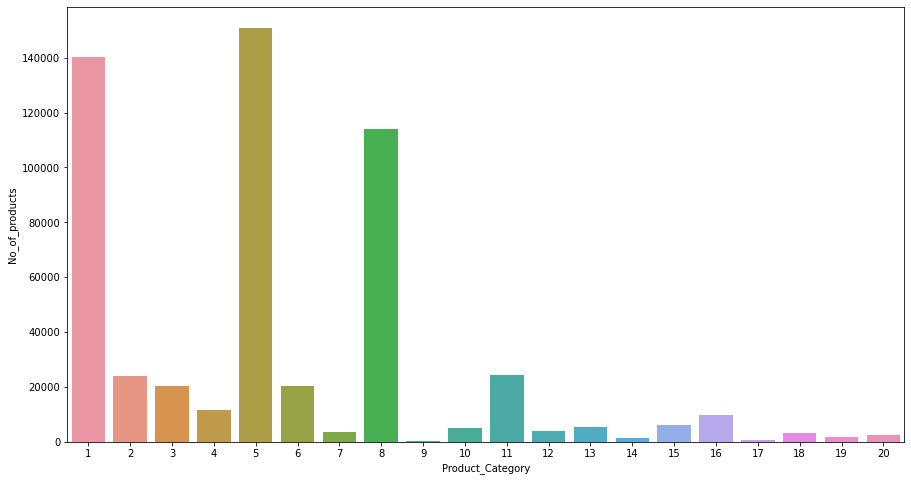

In [382]:
plt.figure(figsize=(15,8))
sns.barplot(x='Product_Category',y='No_of_products',data=x)
plt.show()

#### product category 1 ,5,9 has most number of products

## Top 5 selling products and price range

<AxesSubplot:>

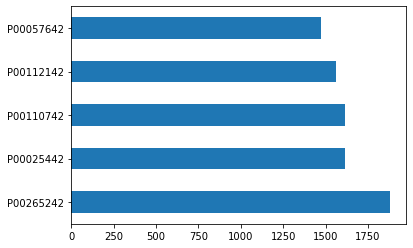

In [391]:
da.Product_ID.value_counts().head().plot(kind='barh')

#### P00057642,P00112142,P00110742,P00025442,P00265242 are top 5 selling products,P00265242 is the most

In [398]:
x=da.groupby('Product_ID')['Purchase'].count().head().to_frame('count').reset_index()
x

,Product_ID,count
0,P00000142,1152
1,P00000242,376
2,P00000342,244
3,P00000442,92
4,P00000542,149


In [538]:
x=da[(da['Product_ID'] =='P00057642')|(da['Product_ID'] =='P00112142')|(da['Product_ID'] =='P00110742')|(da['Product_ID'] =='P00025442')|(da['Product_ID'] =='P00265242')]
x

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
235,1000044,P00112142,M,46-50,17,B,3,Married,1,19072
342,1000058,P00110742,M,26-35,2,B,3,Unmarried,1,15824
399,1000066,P00265242,M,26-35,18,C,2,Unmarried,5,8652
568,1000106,P00112142,F,36-45,11,C,4+,Unmarried,1,19703
667,1000130,P00025442,M,36-45,17,B,3,Married,1,19706
...,...,...,...,...,...,...,...,...,...,...
545359,1005956,P00112142,F,18-25,4,B,2,Unmarried,1,11474
545385,1005958,P00057642,M,46-50,14,C,1,Unmarried,1,19367
545452,1005971,P00112142,M,36-45,7,C,1,Unmarried,1,15769
545513,1005980,P00057642,M,55+,1,C,3,Unmarried,1,15848


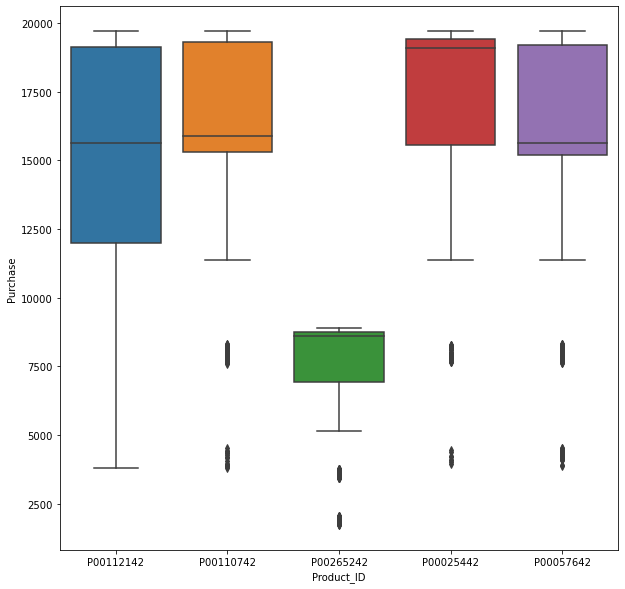

In [409]:
plt.figure(figsize=(10,10))
sns.boxplot(x = 'Product_ID', y = 'Purchase', data = x)
plt.show()

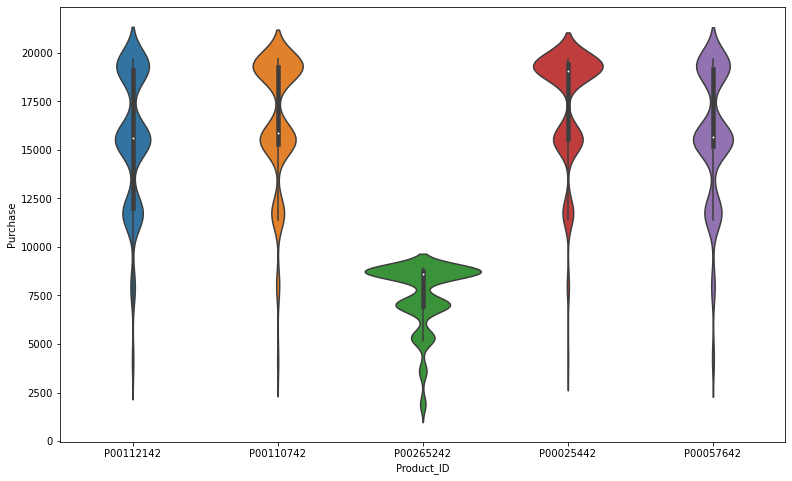

In [541]:
plt.figure(figsize=(13,8))
sns.violinplot(x = 'Product_ID', y = 'Purchase', data = x)
plt.show()

#### Product P00265242 is the lowest price range(5000 to 8500) among these top 5 selling products
#### Product P00112142 is the widest price range product 

## Who are the top 5 most money purchased users

In [440]:
x=da.groupby(['City_Category','User_ID'])['Purchase'].sum().to_frame('totel_purchase_amount_in_lack').reset_index()
x.totel_purchase_amount_in_lack=x.totel_purchase_amount_in_lack/100000
x.sort_values('totel_purchase_amount_in_lack',inplace=True)
x

,City_Category,User_ID,totel_purchase_amount_in_lack
5095,C,1004464,0.46681
2800,C,1000094,0.49288
4744,C,1003883,0.49349
2477,B,1005117,0.49668
5387,C,1004991,0.52371
...,...,...,...
1007,A,1005831,64.89130
362,A,1001941,68.17493
509,A,1002909,74.18991
327,A,1001680,86.52917


In [443]:
x.tail()

,City_Category,User_ID,totel_purchase_amount_in_lack
1007,A,1005831,64.89130
362,A,1001941,68.17493
509,A,1002909,74.18991
327,A,1001680,86.52917
736,A,1004277,104.22059


#### - Top 5 most amount purchased users are 1004277,1001680,1002909,1001941,1005831 
#### - All of them are from city A

## Who are the top 5 most money purchased users in each city

### City A

In [444]:
x[x['City_Category']=='A']

,City_Category,User_ID,totel_purchase_amount_in_lack
916,A,1005391,0.60182
143,A,1000572,0.60789
847,A,1005012,0.63924
884,A,1005274,0.64442
228,A,1001102,0.64520
...,...,...,...
1007,A,1005831,64.89130
362,A,1001941,68.17493
509,A,1002909,74.18991
327,A,1001680,86.52917


#### - Top 5 most amount purchased users in city A are 1004277,1001680,1002909,1001941,1005831

### city B

In [445]:
x[x['City_Category']=='B']

,City_Category,User_ID,totel_purchase_amount_in_lack
2477,B,1005117,0.49668
1956,B,1003291,0.55372
1951,B,1003275,0.55960
2336,B,1004636,0.57805
2390,B,1004839,0.66471
...,...,...,...
2055,B,1003626,47.52695
1618,B,1002116,48.44272
1799,B,1002793,49.24793
1676,B,1002304,51.12607


#### - Top 5 most amount purchased users in city B are 1000550,1002304,1002793,1002116,1003626

### City C

In [446]:
x[x['City_Category']=='C']

,City_Category,User_ID,totel_purchase_amount_in_lack
5095,C,1004464,0.46681
2800,C,1000094,0.49288
4744,C,1003883,0.49349
5387,C,1004991,0.52371
5846,C,1005944,0.53996
...,...,...,...
4995,C,1004287,21.89401
5442,C,1005103,22.98016
3645,C,1001746,23.98714
5671,C,1005568,24.13364


#### - Top 5 most amount purchased users in city C are 1003414,1005568,1001746,1005103,1004287

## how purchase amount vary in each city

In [434]:
x.describe()

,User_ID,totel_purchase_amount_in_lack
count,5.891000e+03,5891.000000
mean,1.003025e+06,8.544566
std,1.743379e+03,9.348172
min,1.000001e+06,0.466810
25%,1.001518e+06,2.345000
50%,1.003026e+06,5.138740
75%,1.004532e+06,11.037810
max,1.006040e+06,104.220590


In [452]:
bin=[0,1,2,5,10,20,50,105]
label=['below 1 lack','1-2 lack','2-5 lack','5-10 lack','10-20 lack','20-50 lack','50 lack+']

x['totel_purchase_amount_in_lack']=pd.cut(x.totel_purchase_amount_in_lack,bins=bin,labels=label)

In [453]:
x.sort_values('totel_purchase_amount_in_lack')

,City_Category,User_ID,totel_purchase_amount_in_lack
5095,C,1004464,below 1 lack
4692,C,1003788,below 1 lack
5591,C,1005409,below 1 lack
4212,C,1002759,below 1 lack
1939,B,1003234,below 1 lack
...,...,...,...
765,A,1004508,50 lack+
296,A,1001449,50 lack+
327,A,1001680,50 lack+
742,A,1004344,50 lack+


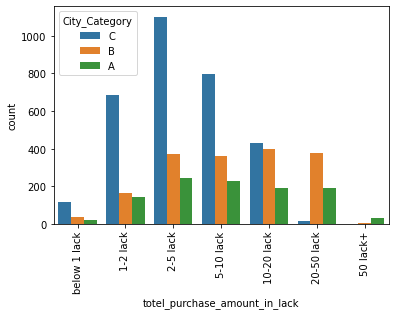

In [460]:
sns.countplot(x='totel_purchase_amount_in_lack',data=x,hue='City_Category')
plt.xticks(rotation=90)
plt.show()

#### Most of the coustemers are purchased totel amount between 2-5 lack
#### Purchased totel amount between 1-2 lack, 2-5 lack, 5-10 lack people in city C is much higher compare to other citys



## Probability of totel amount purchased in each city

In [463]:
s=pd.crosstab(x.totel_purchase_amount_in_lack,x.City_Category,margins=True).reset_index()
s

City_Category,totel_purchase_amount_in_lack,A,B,C,All
0,below 1 lack,22,36,114,172
1,1-2 lack,141,163,684,988
2,2-5 lack,244,372,1103,1719
3,5-10 lack,229,360,797,1386
4,10-20 lack,189,396,427,1012
5,20-50 lack,191,378,14,583
6,50 lack+,29,2,0,31
7,All,1045,1707,3139,5891


In [464]:
s['P(city A /Totel Purchase_amount)']=s['A']/s['All']
s['P(city B /Totel Purchase_amount)']=s['B']/s['All']
s['P(city C /Totel Purchase_amount)']=s['C']/s['All']
s

City_Category,totel_purchase_amount_in_lack,A,B,C,All,P(city A /Totel Purchase_amount),P(city B /Totel Purchase_amount),P(city C /Totel Purchase_amount)
0,below 1 lack,22,36,114,172,0.127907,0.209302,0.662791
1,1-2 lack,141,163,684,988,0.142713,0.164980,0.692308
2,2-5 lack,244,372,1103,1719,0.141943,0.216405,0.641652
3,5-10 lack,229,360,797,1386,0.165224,0.259740,0.575036
4,10-20 lack,189,396,427,1012,0.186759,0.391304,0.421937
5,20-50 lack,191,378,14,583,0.327616,0.648370,0.024014
6,50 lack+,29,2,0,31,0.935484,0.064516,0.000000
7,All,1045,1707,3139,5891,0.177389,0.289764,0.532847


### most probability range of each city
#### City A
#### - 50 lack+
### City B
#### - 20-50 lack
### City C
#### - below 1 lack
#### - 1-2 lack
#### - 2-5 lack
#### - 5-10 lack
#### - 10-20 lack

## Which occupation category has most number of coustemer purchases

C:\Users\I Am Guest\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


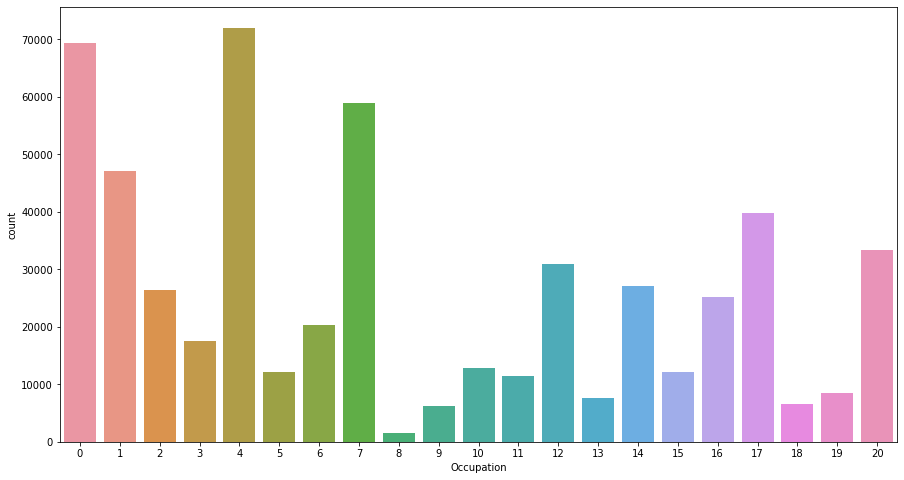

In [498]:
plt.figure(figsize=(15,8))
sns.countplot(da['Occupation'])
plt.show()

#### most number of purchase are by occupation categorys are 1,4,7

## Which occupation category has most purchase mean

<AxesSubplot:ylabel='Purchase'>

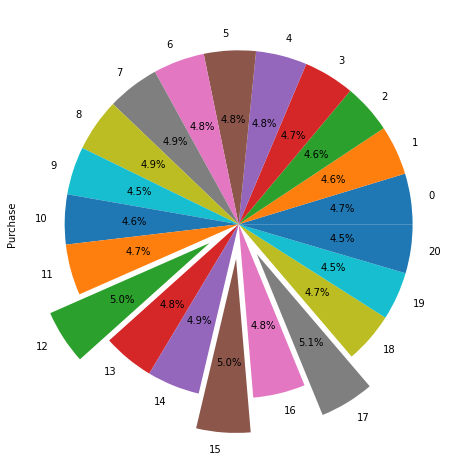

In [536]:
plt.figure(figsize=(15,8))
da.groupby('Occupation')['Purchase'].mean().plot(kind='pie',autopct='%1.1f%%',explode=(0,0,0,0,0,0,0,0,0,0,0,0,0.2,0,0,0.2,0,0.2,0,0,0))

#### > Purchase mean high for occupation category 12,15,17

### which city has the highest purchase in each age group

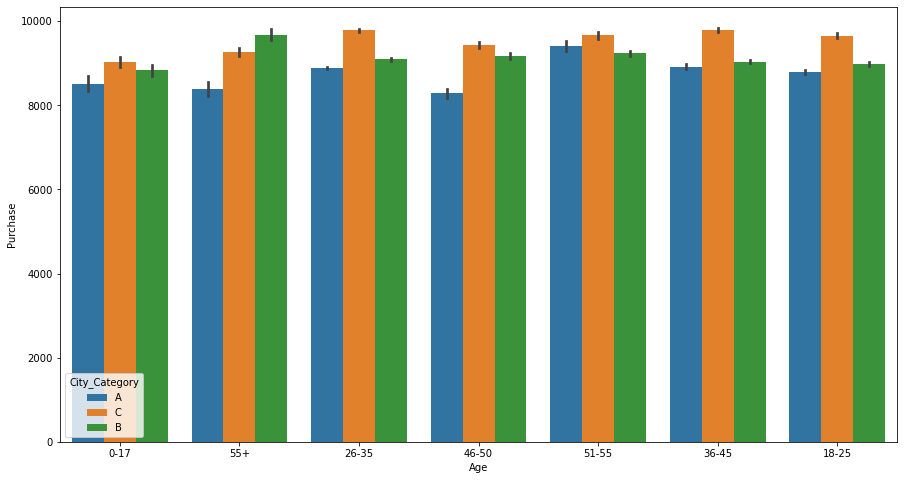

In [497]:
plt.figure(figsize=(15,8))
sns.barplot(x='Age',y='Purchase',data=da,hue='City_Category')
plt.show()

#### City C has most purchase amount of the age 0-17,18-25,26-35,36-45,46-50,51-55 
#### For age 55+ city B has most purchase amount value

### Which city has the highest purchase in each Product_Category

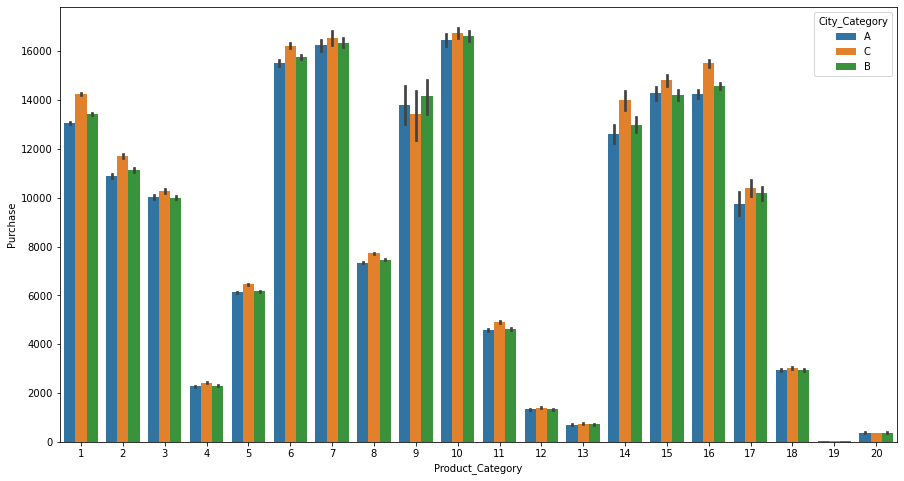

In [499]:
plt.figure(figsize=(15,8))
sns.barplot(x='Product_Category',y='Purchase',data=da,hue='City_Category')
plt.show()

#### For almost all product catogerys city c has highest purchase amount 

# recommentation

- No of male coustmers are higher than female.Also purchase mean is high for male.so,We can more increse men related items 
- In case of Marital_Status higher no.of purchase are done by unmarried people.And also unmarried purchase mean also higher.so,
  we can give more importance to unmarried people
- People in age category 26-35 are most number of coustomers.so, in this age catogery related products are more importent
- Two statistics have non-overlapping confidence intervals, they are necessarily significantly different but if they have 
  overlapping confidence intervals, it is not necessarily true that they are not significantly different.
- purchase mean of male and female are  incresing with stay in current city increses. these are the most importent peoples 
  for growing the business
- Occupation 4,0,7 are the top 3 most purchasing category and occupation 18,9,8 are the least 3 most purchasing category. 
  So,these are another importent peoples for growing the business
- Purchase mean high for occupation category 12,15,17 we can recommend them more branded varity of products
- City C is the most purchase mean compare to other citys For male and female, purchase mean high is male in every city.
  therefore giving more importence to city C peoples will leads to more growth to selling
- Almost all city has purchase values in betwwen 0 to 25k. these price range products are importent
- 1,5,8 are the most purchasing product category for both males and females. these are the most importent products in walmart
  also these product category are high for both married and unmarried people
- Most 5 expensive product category are 10,7,6,16,15,9. So, we can more promote and advertise these product catogery
- P00057642,P00112142,P00110742,P00025442,P00265242 are top 5 selling products,P00265242 is the most these are the most
  importent products. we can import more diffrent company products in these products to improve sales
- Product P00265242 is the lowest price range(5000 to 8500) among these top 5 selling products. We can sell higher value brands
  for this product
- Top 5 most amount purchased users are 1004277,1001680,1002909,1001941,1005831 .Give more discounts or free gits and improve
  coustomer friendly relationship. Also consider top purchasing people in each citys
- Most of the coustemers are purchased totel amount between 2-5 lack. Purchased totel amount between 1-2 lack, 2-5 lack,
  5-10 lack people in city C is much higher compare to other citys.So we can give more varity of products for 2-5 lack spending 
  coustomers
- Probabilty of spending 50+ lack for city A is higher. We can give more branded products to city A
- In city B most of them are between 20-50 lack of net spending. We can give more varity of products to city B
- For almost all product catogerys city c has highest purchase amount. so, we can sell some highly rated products in city C